## Import Required Libraries

In [390]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from deep_translator import GoogleTranslator

from tensorflow.keras import Sequential
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error


## Load the data file

In [391]:
# set filepath for the data
data_file_path = '../data/'

# Load the data
df = pd.read_excel(data_file_path+'h22index-42.xlsx', header=1, skipfooter=6, na_values=[r'-', r'–', r'－'])
df.head()

Unnamed: 0   キャベツ  ねぎ     レタス  ばれいしょ  たまねぎ  きゅうり    トマト  ほうれんそう  にんじん  \
0   平成29年11月6日の週  171.0 NaN   763.0    NaN   NaN   NaN  783.0     NaN   NaN   
1  平成29年11月13日の週  198.0 NaN   909.0    NaN   NaN   NaN  771.0     NaN   NaN   
2  平成29年11月20日の週  196.0 NaN   873.0    NaN   NaN   NaN  757.0     NaN   NaN   
3  平成29年11月27日の週  207.0 NaN   969.0    NaN   NaN   NaN  762.0     NaN   NaN   
4   平成29年12月4日の週  221.0 NaN  1109.0    NaN   NaN   NaN  794.0     NaN   NaN   

    はくさい   だいこん  なす  
0  189.0  192.0 NaN  
1  195.0  190.0 NaN  
2  209.0  190.0 NaN  
3  236.0  204.0 NaN  
4  243.0  215.0 NaN

In [392]:
# verify only relevant data at the end of the dataframe
df.tail()

Unnamed: 0   キャベツ     ねぎ    レタス  ばれいしょ   たまねぎ   きゅうり    トマト  ほうれんそう  \
244   令和4年9月19日の週  141.0  854.0  580.0  380.0  311.0  591.0  867.0     NaN   
245   令和4年9月26日の週  157.0  855.0  560.0  375.0  303.0  602.0  878.0     NaN   
246   令和4年10月3日の週  162.0  814.0  545.0    NaN  298.0    NaN  897.0     NaN   
247  令和4年10月10日の週  173.0  791.0  556.0    NaN  291.0    NaN  913.0     NaN   
248  令和4年10月17日の週  167.0  785.0  533.0    NaN  283.0    NaN  910.0     NaN   

      にんじん   はくさい   だいこん  なす  
244  544.0    NaN    NaN NaN  
245  527.0    NaN    NaN NaN  
246  508.0  234.0  255.0 NaN  
247  480.0  239.0  251.0 NaN  
248  479.0  236.0  228.0 NaN

As we can see from the above sample, the column names and the first column values are in `Japanese`.

Before proceeding any further, I will translate the `Japanese` text into `English`.

## Data Translation

In [393]:
# extract the column names and the contents of the `Unnamed: 0` column
orig_col_names = list(df.columns[1:])
first_col_vals = list(df['Unnamed: 0'])

# translate the column names and the `Unnamed: 0` column contents
translated_col_names = GoogleTranslator(source='ja', target='en').translate_batch(orig_col_names)
translated_col_vals = GoogleTranslator(source='ja', target='en').translate_batch(first_col_vals)

In [394]:
# view a sample of the translated column names
translated_col_names[1:7]

['green onion', 'lettuce', 'potatoes', 'onion', 'Cucumber', 'tomato']

In [395]:
# view a sample of the translated first column values
translated_col_vals[1:4]

['Week of November 13, 2017',
 'Week of November 20, 2017',
 'Week of November 27, 2017']

Here, we can see that each row in the dataset represents the weekly data.
- and the week starts on `Monday`.

In [396]:
# extract date string from the translated first column values
translated_col_vals = [date[8:] for date in translated_col_vals]

translated_col_vals[1:4]

['November 13, 2017', 'November 20, 2017', 'November 27, 2017']

In [397]:
# make all vegetable names to lower case
translated_col_names = [name.lower() for name in translated_col_names]

# add 'Date' as the column name for the first column
translated_col_names.insert(0, 'Date')


# replace the column names and `Unnamed: 0` column contents with translated text
df.columns = translated_col_names
df['Date'] = pd.to_datetime(translated_col_vals, format='%B %d, %Y')

df.head()

Date  cabbage  green onion  lettuce  potatoes  onion  cucumber  \
0 2017-11-06    171.0          NaN    763.0       NaN    NaN       NaN   
1 2017-11-13    198.0          NaN    909.0       NaN    NaN       NaN   
2 2017-11-20    196.0          NaN    873.0       NaN    NaN       NaN   
3 2017-11-27    207.0          NaN    969.0       NaN    NaN       NaN   
4 2017-12-04    221.0          NaN   1109.0       NaN    NaN       NaN   

   tomato  spinach  carrot  chinese cabbage  radish  eggplant  
0   783.0      NaN     NaN            189.0   192.0       NaN  
1   771.0      NaN     NaN            195.0   190.0       NaN  
2   757.0      NaN     NaN            209.0   190.0       NaN  
3   762.0      NaN     NaN            236.0   204.0       NaN  
4   794.0      NaN     NaN            243.0   215.0       NaN

In [398]:
df.tail()

Date  cabbage  green onion  lettuce  potatoes  onion  cucumber  \
244 2022-09-19    141.0        854.0    580.0     380.0  311.0     591.0   
245 2022-09-26    157.0        855.0    560.0     375.0  303.0     602.0   
246 2022-10-03    162.0        814.0    545.0       NaN  298.0       NaN   
247 2022-10-10    173.0        791.0    556.0       NaN  291.0       NaN   
248 2020-10-17    167.0        785.0    533.0       NaN  283.0       NaN   

     tomato  spinach  carrot  chinese cabbage  radish  eggplant  
244   867.0      NaN   544.0              NaN     NaN       NaN  
245   878.0      NaN   527.0              NaN     NaN       NaN  
246   897.0      NaN   508.0            234.0   255.0       NaN  
247   913.0      NaN   480.0            239.0   251.0       NaN  
248   910.0      NaN   479.0            236.0   228.0       NaN

We can see above that the index is not sequential.
- I will make it sequential in the below section to have an ordered time-series.

In [399]:
# make the 'Date' column sequential
df.sort_values(by='Date', inplace=True)

# set the 'Date' column as the index
df.set_index(keys='Date', inplace=True)

df.head()

cabbage  green onion  lettuce  potatoes  onion  cucumber  tomato  \
Date                                                                           
2017-11-06    171.0          NaN    763.0       NaN    NaN       NaN   783.0   
2017-11-13    198.0          NaN    909.0       NaN    NaN       NaN   771.0   
2017-11-20    196.0          NaN    873.0       NaN    NaN       NaN   757.0   
2017-11-27    207.0          NaN    969.0       NaN    NaN       NaN   762.0   
2017-12-04    221.0          NaN   1109.0       NaN    NaN       NaN   794.0   

            spinach  carrot  chinese cabbage  radish  eggplant  
Date                                                            
2017-11-06      NaN     NaN            189.0   192.0       NaN  
2017-11-13      NaN     NaN            195.0   190.0       NaN  
2017-11-20      NaN     NaN            209.0   190.0       NaN  
2017-11-27      NaN     NaN            236.0   204.0       NaN  
2017-12-04      NaN     NaN            243.0   215.0       NaN

In [400]:
df.tail()

cabbage  green onion  lettuce  potatoes  onion  cucumber  tomato  \
Date                                                                           
2022-09-12    137.0        858.0    539.0     384.0  319.0     618.0   847.0   
2022-09-19    141.0        854.0    580.0     380.0  311.0     591.0   867.0   
2022-09-26    157.0        855.0    560.0     375.0  303.0     602.0   878.0   
2022-10-03    162.0        814.0    545.0       NaN  298.0       NaN   897.0   
2022-10-10    173.0        791.0    556.0       NaN  291.0       NaN   913.0   

            spinach  carrot  chinese cabbage  radish  eggplant  
Date                                                            
2022-09-12      NaN   518.0              NaN     NaN       NaN  
2022-09-19      NaN   544.0              NaN     NaN       NaN  
2022-09-26      NaN   527.0              NaN     NaN       NaN  
2022-10-03      NaN   508.0            234.0   255.0       NaN  
2022-10-10      NaN   480.0            239.0   251.0       NaN

In [401]:
# get shape of the dataframe
rows, vars = df.shape

print(f'We have {rows} records and {vars} number of independent variables.')

We have 249 records and 12 number of independent variables.


## Data Cleaning and Pre-processing

### Check Missing data
### i. check missing indexes

In [402]:
# check for missing dates in the index
missing_weeks = pd.date_range(start='2017-11-06', end='2022-10-10', freq='W-MON').difference(df.index)
print(f'The missing weeks in the dataset are:\n{missing_weeks}')

The missing weeks in the dataset are:
DatetimeIndex(['2018-01-01', '2018-04-30', '2018-12-31', '2019-04-29',
               '2019-12-30', '2020-05-04', '2020-12-28', '2021-05-03',
               '2021-12-27', '2022-04-04', '2022-05-02', '2022-06-20',
               '2022-07-04'],
              dtype='datetime64[ns]', freq=None)


### ii. check missing values

In [403]:
# check count of null values
df.isna().sum()

cabbage              2
green onion         72
lettuce              2
potatoes           125
onion               47
cucumber           126
tomato               2
spinach            199
carrot             146
chinese cabbage    125
radish             118
eggplant           200
dtype: int64

We can see all the columns have missing values in varying degree.
- `eggplant`, and `spinach` has 200 and 199 missing values out of 249 records respectively.
- `carrots` has about 146 missing values.
- `potatoes`, `cucumber`, `chinese cabbage`, and `radish` has about 125 missing values.

### iii. further explore the missing data

In [404]:
# check if any row has missing value for all columns
tmp_df = df[df.isnull().all(axis=1)]

tmp_df

cabbage  green onion  lettuce  potatoes  onion  cucumber  tomato  \
Date                                                                           
2020-04-20      NaN          NaN      NaN       NaN    NaN       NaN     NaN   
2020-04-27      NaN          NaN      NaN       NaN    NaN       NaN     NaN   

            spinach  carrot  chinese cabbage  radish  eggplant  
Date                                                            
2020-04-20      NaN     NaN              NaN     NaN       NaN  
2020-04-27      NaN     NaN              NaN     NaN       NaN

For the weeks of $20^{th}$ and $27^{th}$ April 2020, we have missing values for all the variables.
- From the website of Japanese Ministry of Agriculture, Forestry and Fisheries, we have the information that:
  - No data was collected nationwide for these weeks.
- We can assume the same for the above identified 13 weeks for which there are no records in the dataset.

Add these two weeks also to the `missing_weeks`

In [405]:
missing_weeks = missing_weeks.append(tmp_df.index)

missing_weeks

DatetimeIndex(['2018-01-01', '2018-04-30', '2018-12-31', '2019-04-29',
               '2019-12-30', '2020-05-04', '2020-12-28', '2021-05-03',
               '2021-12-27', '2022-04-04', '2022-05-02', '2022-06-20',
               '2022-07-04', '2020-04-20', '2020-04-27'],
              dtype='datetime64[ns]', freq=None)

In [406]:
# drop the 20th and 27th April indexes from the dataframe for now
df.drop(index=tmp_df.index, inplace=True)

<AxesSubplot:>

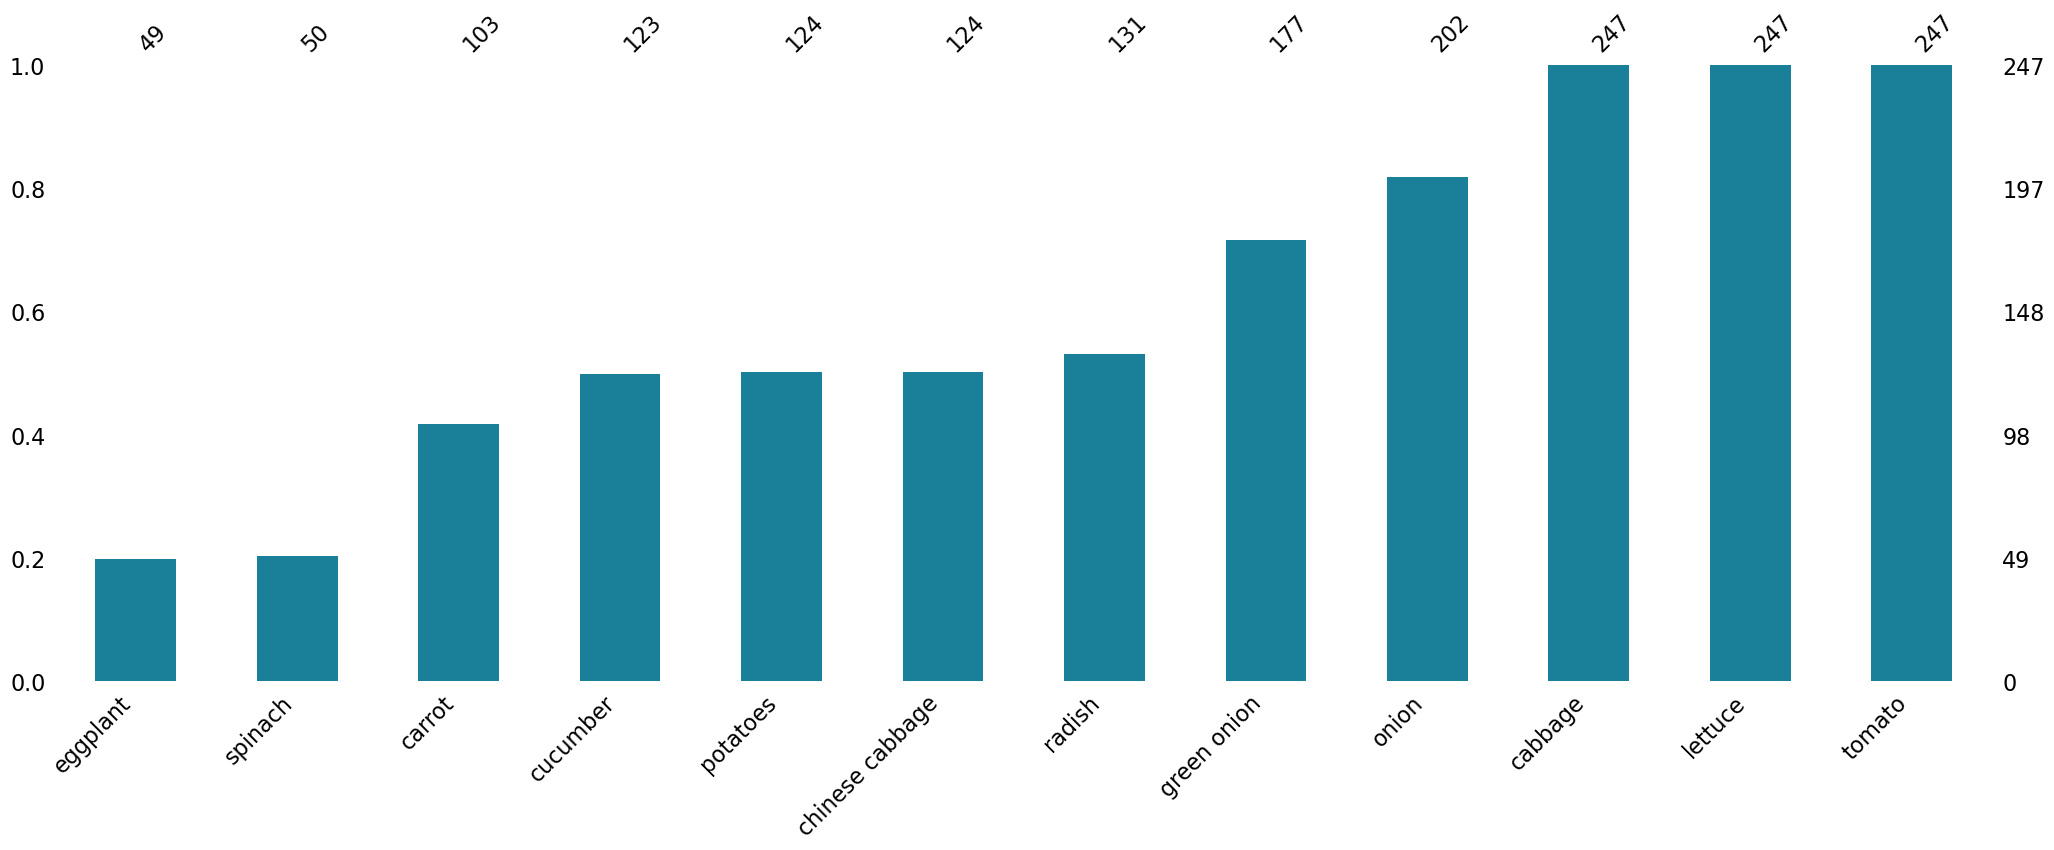

In [407]:
# visualise the count of missing data
msno.bar(df, figsize=(25,8), color=(0.1, 0.5, 0.6), sort='ascending')

From the above bar graph, we have the following notable observations:
1. `spinach` and `eggplant` have almost 80% of their data missing.
2. `potatoes`, `cucumber`, `carrots`, `chinese cabbage`, and `radish` have about 60% of their data missing.

<AxesSubplot:>

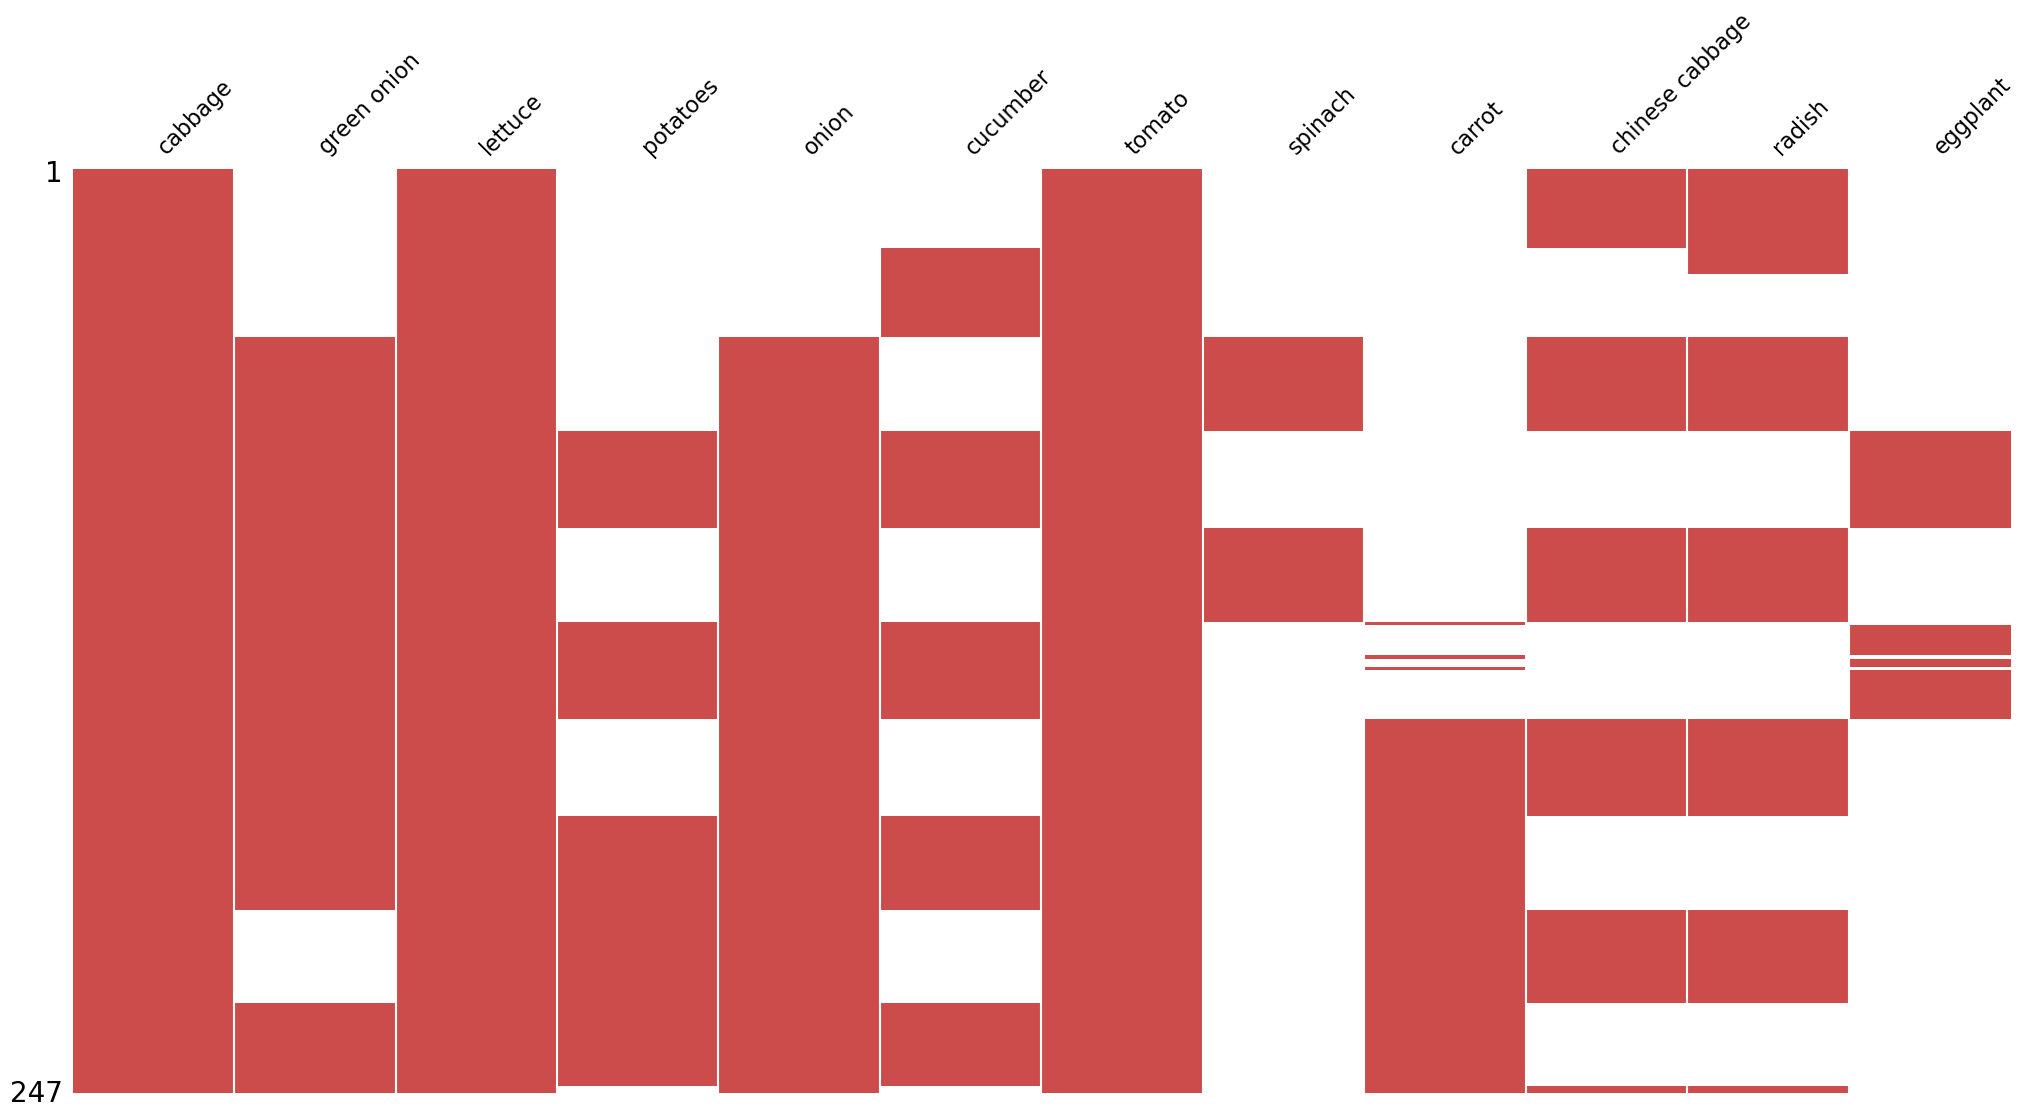

In [408]:
# visualise the pattern of missing values
msno.matrix(df, figsize=(25,12), color=(0.8, 0.3, 0.3), sparkline=False)

From the above matrix, we have the following notable observations:
1. `chinese cabbage`, `radish`, and `cucumber` seems to have seasonal pattern in its missing values.
2. `chinese cabbage`, and `radish` have missing data during opposite intervals compared to `cucumber`.
3. `green onion` and `onion` have missing data during the initial times.

<AxesSubplot:>

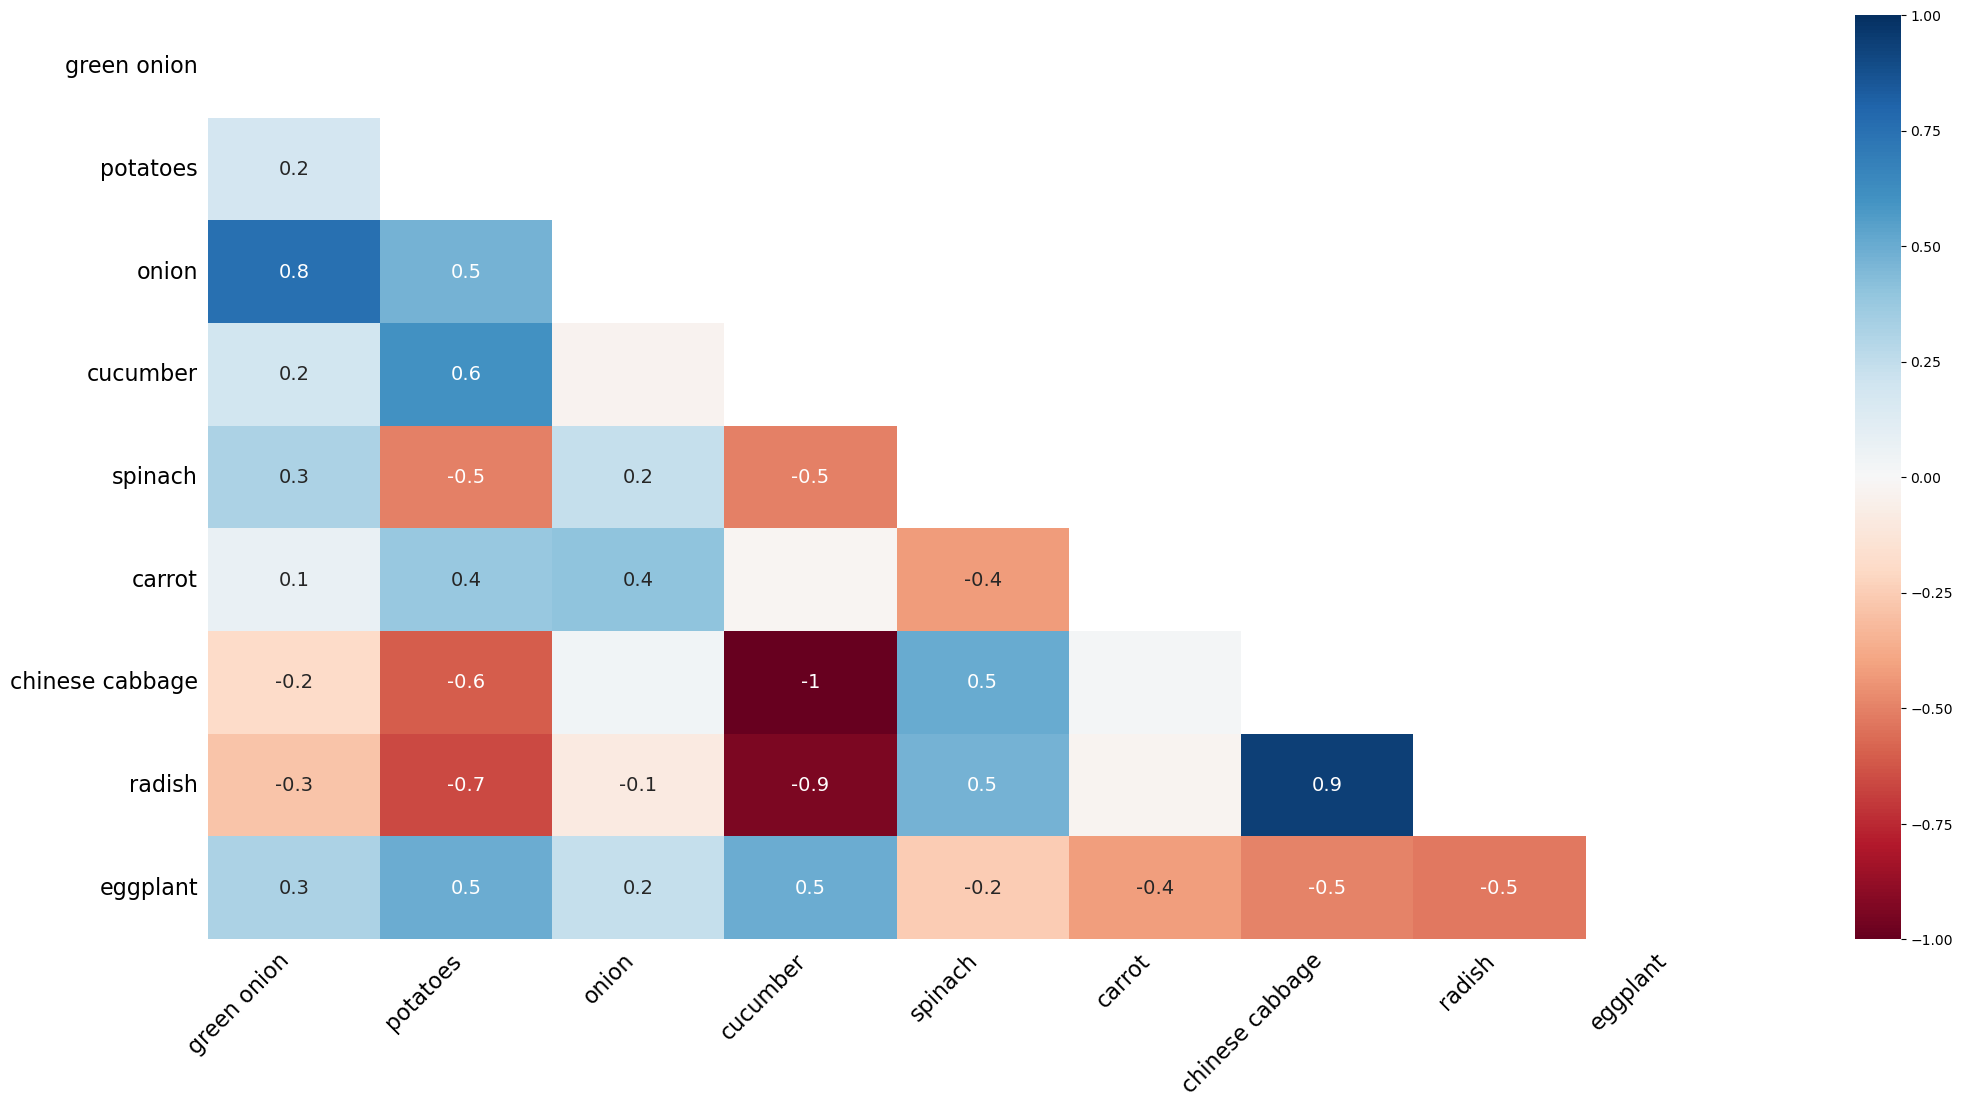

In [409]:
# visualise the correlation between the variables in terms of occurance of missing value
msno.heatmap(df, figsize=(25,12))

From the above correlation heatmap, we have the following notable observations:
1. `onion` and `green onion` has a nullity correlation of 0.8, indicating that for these two, the occurance of missing values is highly correlated.
2. `chinese cabbage` and `radish` has a nullity correlation of -1 and -0.9 with `cucumber` respectively, indicating that the occurance of missing values between them are highly correlated, but in negative order, i.e. when data for `cucumber` is available, it is not available for `chinese cabbage` and `radish`, and vice-versa. This could be due to seasonal nature of these vegetables.
3. `chinese cabbage` and `radish` also has a very high nullity correlation of almost 0.9.

### iv. Add the missing weeks

To maintain the continuity in the time series,
- I will add the above identified missing weeks also into the dataset with null values.
- and check for patterns in missing data again.

In [410]:
# build a temporary dataframe with missing weeks as index
# and the same columns as the main dataset
tmp_df = pd.DataFrame(index=missing_weeks, columns=df.columns)

# concat this temporary dataframe to the main dataset
tmp_df = pd.concat([df, tmp_df])

# sort the dataframe according to the index
tmp_df.sort_index(inplace=True)

# set index to weekly period with 'Monday' as the starting day of the week
tmp_df.index.to_period('W-MON')         

tmp_df.head()

cabbage green onion lettuce potatoes onion cucumber tomato spinach  \
2017-11-06   171.0         NaN   763.0      NaN   NaN      NaN  783.0     NaN   
2017-11-13   198.0         NaN   909.0      NaN   NaN      NaN  771.0     NaN   
2017-11-20   196.0         NaN   873.0      NaN   NaN      NaN  757.0     NaN   
2017-11-27   207.0         NaN   969.0      NaN   NaN      NaN  762.0     NaN   
2017-12-04   221.0         NaN  1109.0      NaN   NaN      NaN  794.0     NaN   

           carrot chinese cabbage radish eggplant  
2017-11-06    NaN           189.0  192.0      NaN  
2017-11-13    NaN           195.0  190.0      NaN  
2017-11-20    NaN           209.0  190.0      NaN  
2017-11-27    NaN           236.0  204.0      NaN  
2017-12-04    NaN           243.0  215.0      NaN

<AxesSubplot:>

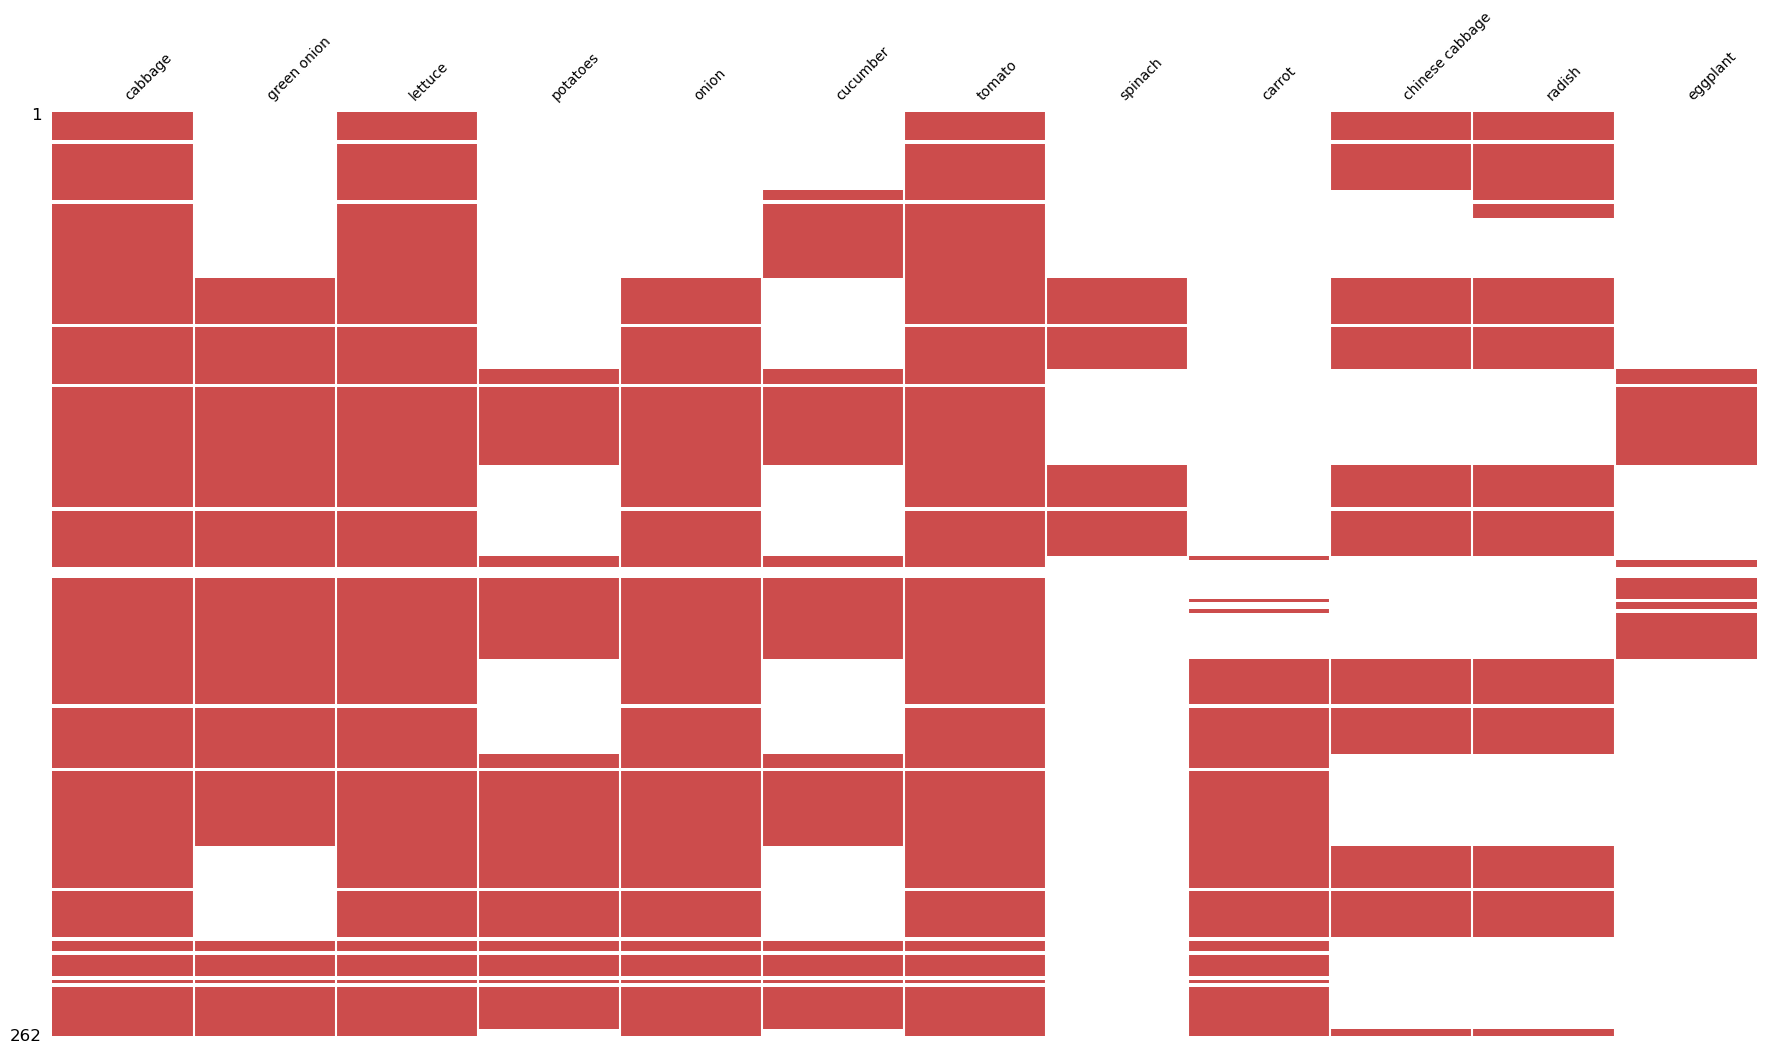

In [411]:
# visualise the pattern of missing data again after the addition of the missing weaks
msno.matrix(tmp_df, figsize=(22,12), color=(0.8, 0.3, 0.3), fontsize=10, sparkline=False)

From the above matrix, we have the following observations:
1. The missing weaks identified previously are randomly distributed across the whole dataset.

### Impute the Missing data

From the above exploration of the missing values and background research, we have the following insights into the missing values:
1. Eggplant and Spinach has about 80% missing data, and Carrot has about 60% missing data.
   - these three columns should be removed from our consideration owing to such high missing data in them.</br></br>
2. Chinese Cabbage, Radish and Cucumber have missing data but in a seasonal pattern
   - this indicates seasonality in the trend and hence we should try to keep this seasonal information in the dataset.
   - we can impute the period with seasonal missing values with 0.</br></br>
3. No data was collected nationwide on 20th and 27th April 2020.
   - this maybe due to some restrictions implemented nationwide against corona.
   - similar plausible reasons could also be behind the missing data for the 13 weeks which were identified to be missing from the original dataset.
   - we can impute the values for these weeks.

In [412]:
# remove columns with high missing values
df.drop(columns=['spinach', 'eggplant', 'carrot'], inplace=True)

df.head()

cabbage  green onion  lettuce  potatoes  onion  cucumber  tomato  \
Date                                                                           
2017-11-06    171.0          NaN    763.0       NaN    NaN       NaN   783.0   
2017-11-13    198.0          NaN    909.0       NaN    NaN       NaN   771.0   
2017-11-20    196.0          NaN    873.0       NaN    NaN       NaN   757.0   
2017-11-27    207.0          NaN    969.0       NaN    NaN       NaN   762.0   
2017-12-04    221.0          NaN   1109.0       NaN    NaN       NaN   794.0   

            chinese cabbage  radish  
Date                                 
2017-11-06            189.0   192.0  
2017-11-13            195.0   190.0  
2017-11-20            209.0   190.0  
2017-11-27            236.0   204.0  
2017-12-04            243.0   215.0

In [413]:
# maintain an original copy of the dataset before imputing any values
df_copy = df.copy(deep=True)

# replace missing values in chinese cabbage, radish and cucumber to zero
df['chinese cabbage'].fillna(0, inplace=True)
df['radish'].fillna(0, inplace=True)
df['cucumber'].fillna(0, inplace=True)

df.head()

cabbage  green onion  lettuce  potatoes  onion  cucumber  tomato  \
Date                                                                           
2017-11-06    171.0          NaN    763.0       NaN    NaN       0.0   783.0   
2017-11-13    198.0          NaN    909.0       NaN    NaN       0.0   771.0   
2017-11-20    196.0          NaN    873.0       NaN    NaN       0.0   757.0   
2017-11-27    207.0          NaN    969.0       NaN    NaN       0.0   762.0   
2017-12-04    221.0          NaN   1109.0       NaN    NaN       0.0   794.0   

            chinese cabbage  radish  
Date                                 
2017-11-06            189.0   192.0  
2017-11-13            195.0   190.0  
2017-11-20            209.0   190.0  
2017-11-27            236.0   204.0  
2017-12-04            243.0   215.0

In [414]:
# now concatenate the 13 missing weeks identified previously to the dataframe
# and interpolate the missing values for all the columns
# concat the temporary dataframe to the main dataset
tmp_df = pd.DataFrame(index=missing_weeks, columns=df.columns)
df = pd.concat([df, tmp_df])

# sort the dataframe according to the index
df.sort_index(inplace=True)

# set index to weekly period with 'Monday' as the starting day of the week
df.index.to_period('W-MON')       

df.head()

cabbage green onion lettuce potatoes onion cucumber tomato  \
2017-11-06   171.0         NaN   763.0      NaN   NaN      0.0  783.0   
2017-11-13   198.0         NaN   909.0      NaN   NaN      0.0  771.0   
2017-11-20   196.0         NaN   873.0      NaN   NaN      0.0  757.0   
2017-11-27   207.0         NaN   969.0      NaN   NaN      0.0  762.0   
2017-12-04   221.0         NaN  1109.0      NaN   NaN      0.0  794.0   

           chinese cabbage radish  
2017-11-06           189.0  192.0  
2017-11-13           195.0  190.0  
2017-11-20           209.0  190.0  
2017-11-27           236.0  204.0  
2017-12-04           243.0  215.0

In [415]:
# check dtypes of the dataframe columns
df.dtypes

cabbage            object
green onion        object
lettuce            object
potatoes           object
onion              object
cucumber           object
tomato             object
chinese cabbage    object
radish             object
dtype: object

The data type of all the columns are of `object` dtype.
- So, we must transform it to appropriate dtype of `float64`.

In [416]:
# convert dtypes of all the columns to appropriate dtype float
# df = df.convert_dtypes()
df = df.astype('float64')

In [417]:
# check updated dtypes
df.dtypes

cabbage            float64
green onion        float64
lettuce            float64
potatoes           float64
onion              float64
cucumber           float64
tomato             float64
chinese cabbage    float64
radish             float64
dtype: object

Before imputing the missing values, let's first explore the data to identify proper imputation technique.

#### i. distribution of the variables

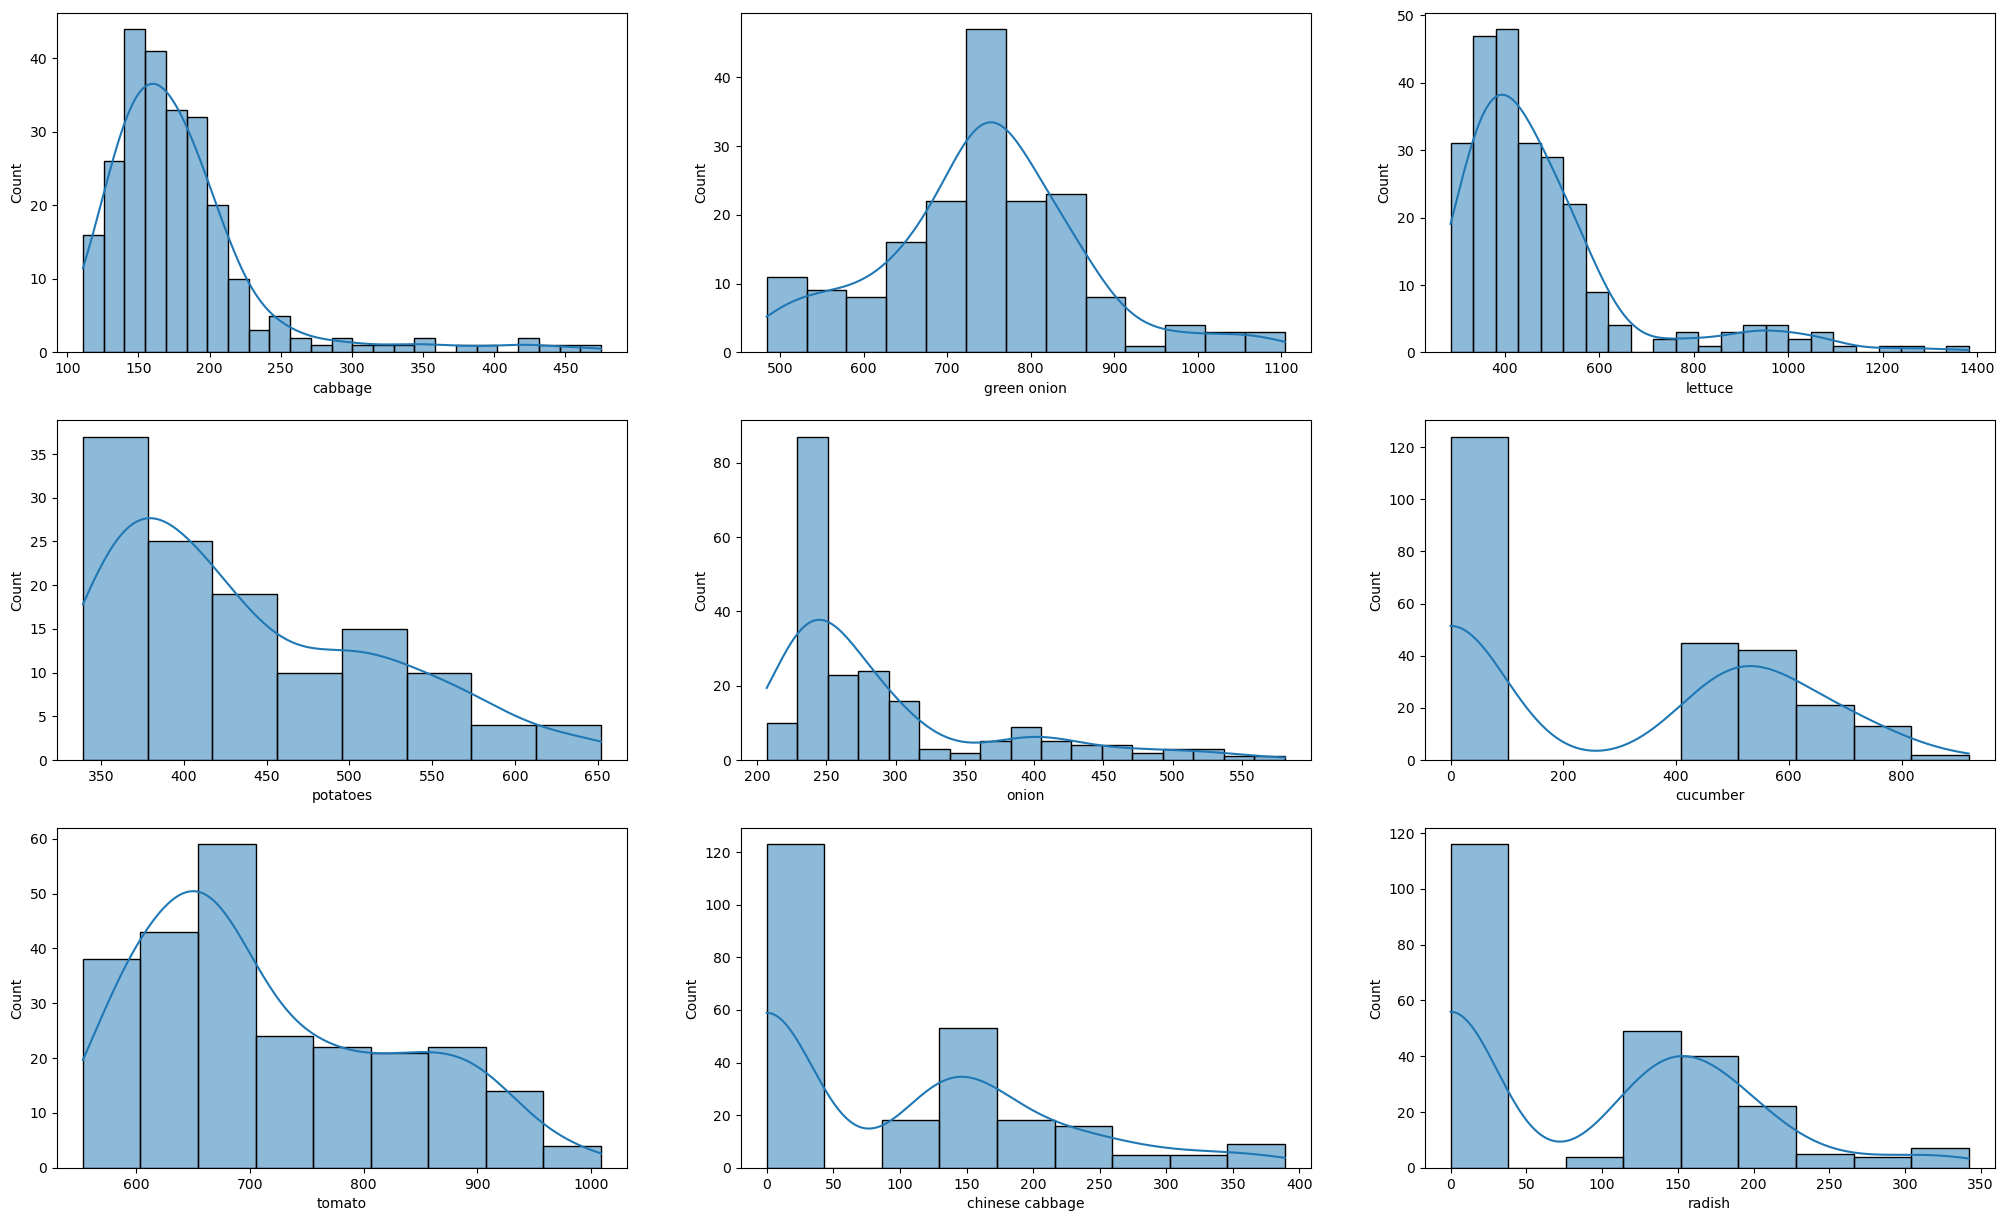

In [418]:
# define figure
plt.figure(figsize=(25,15))
idx = 1

# plot histogram for all the columns
for col_name in df.columns:
    plt.subplot(3, 3, idx)
    # sns.kdeplot(data=df, x=col_name, fill=True)
    sns.histplot(data=df, x=col_name, kde=True)

    idx += 1

plt.show()

Major observations:
1. The plots have a right-skewed uniform distribution
2. `cucumber`, `chinese cabbage` and `radish` have a peak at zero also, as we had filled the seasonal missing values with `0`.

#### ii. boxplot

<AxesSubplot:>

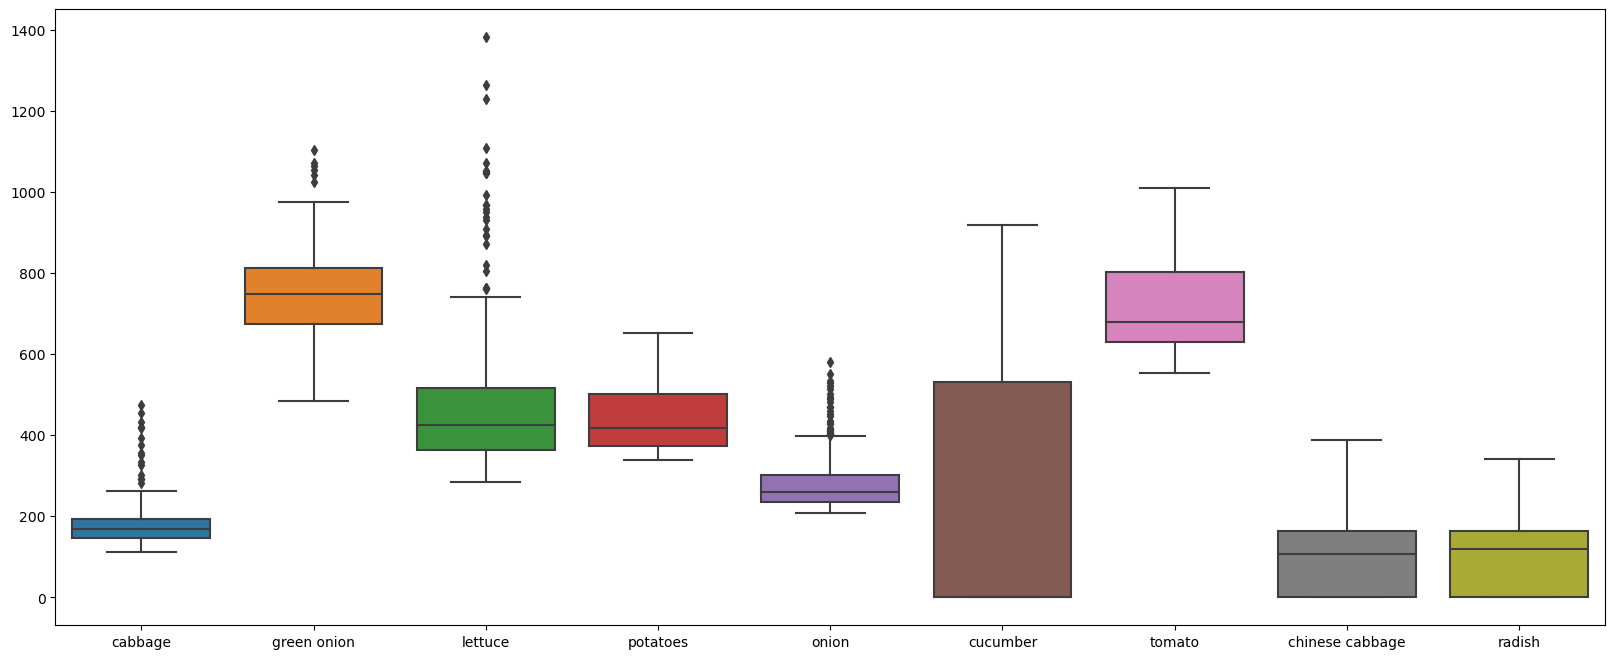

In [419]:
# define figure
plt.figure(figsize=(20,8))

# boxplot for all the columns
sns.boxplot(data=df)

Major Observations:
1. `cabbage`, `green onion`, `lettuce` and `onion` have global outliers.
2. `chinese cabbage` and `radish` have similar range of price.
3. Similarly `lettuce` and `potatoes` have similar range of price.

#### iii. price trend over time for all vegetables

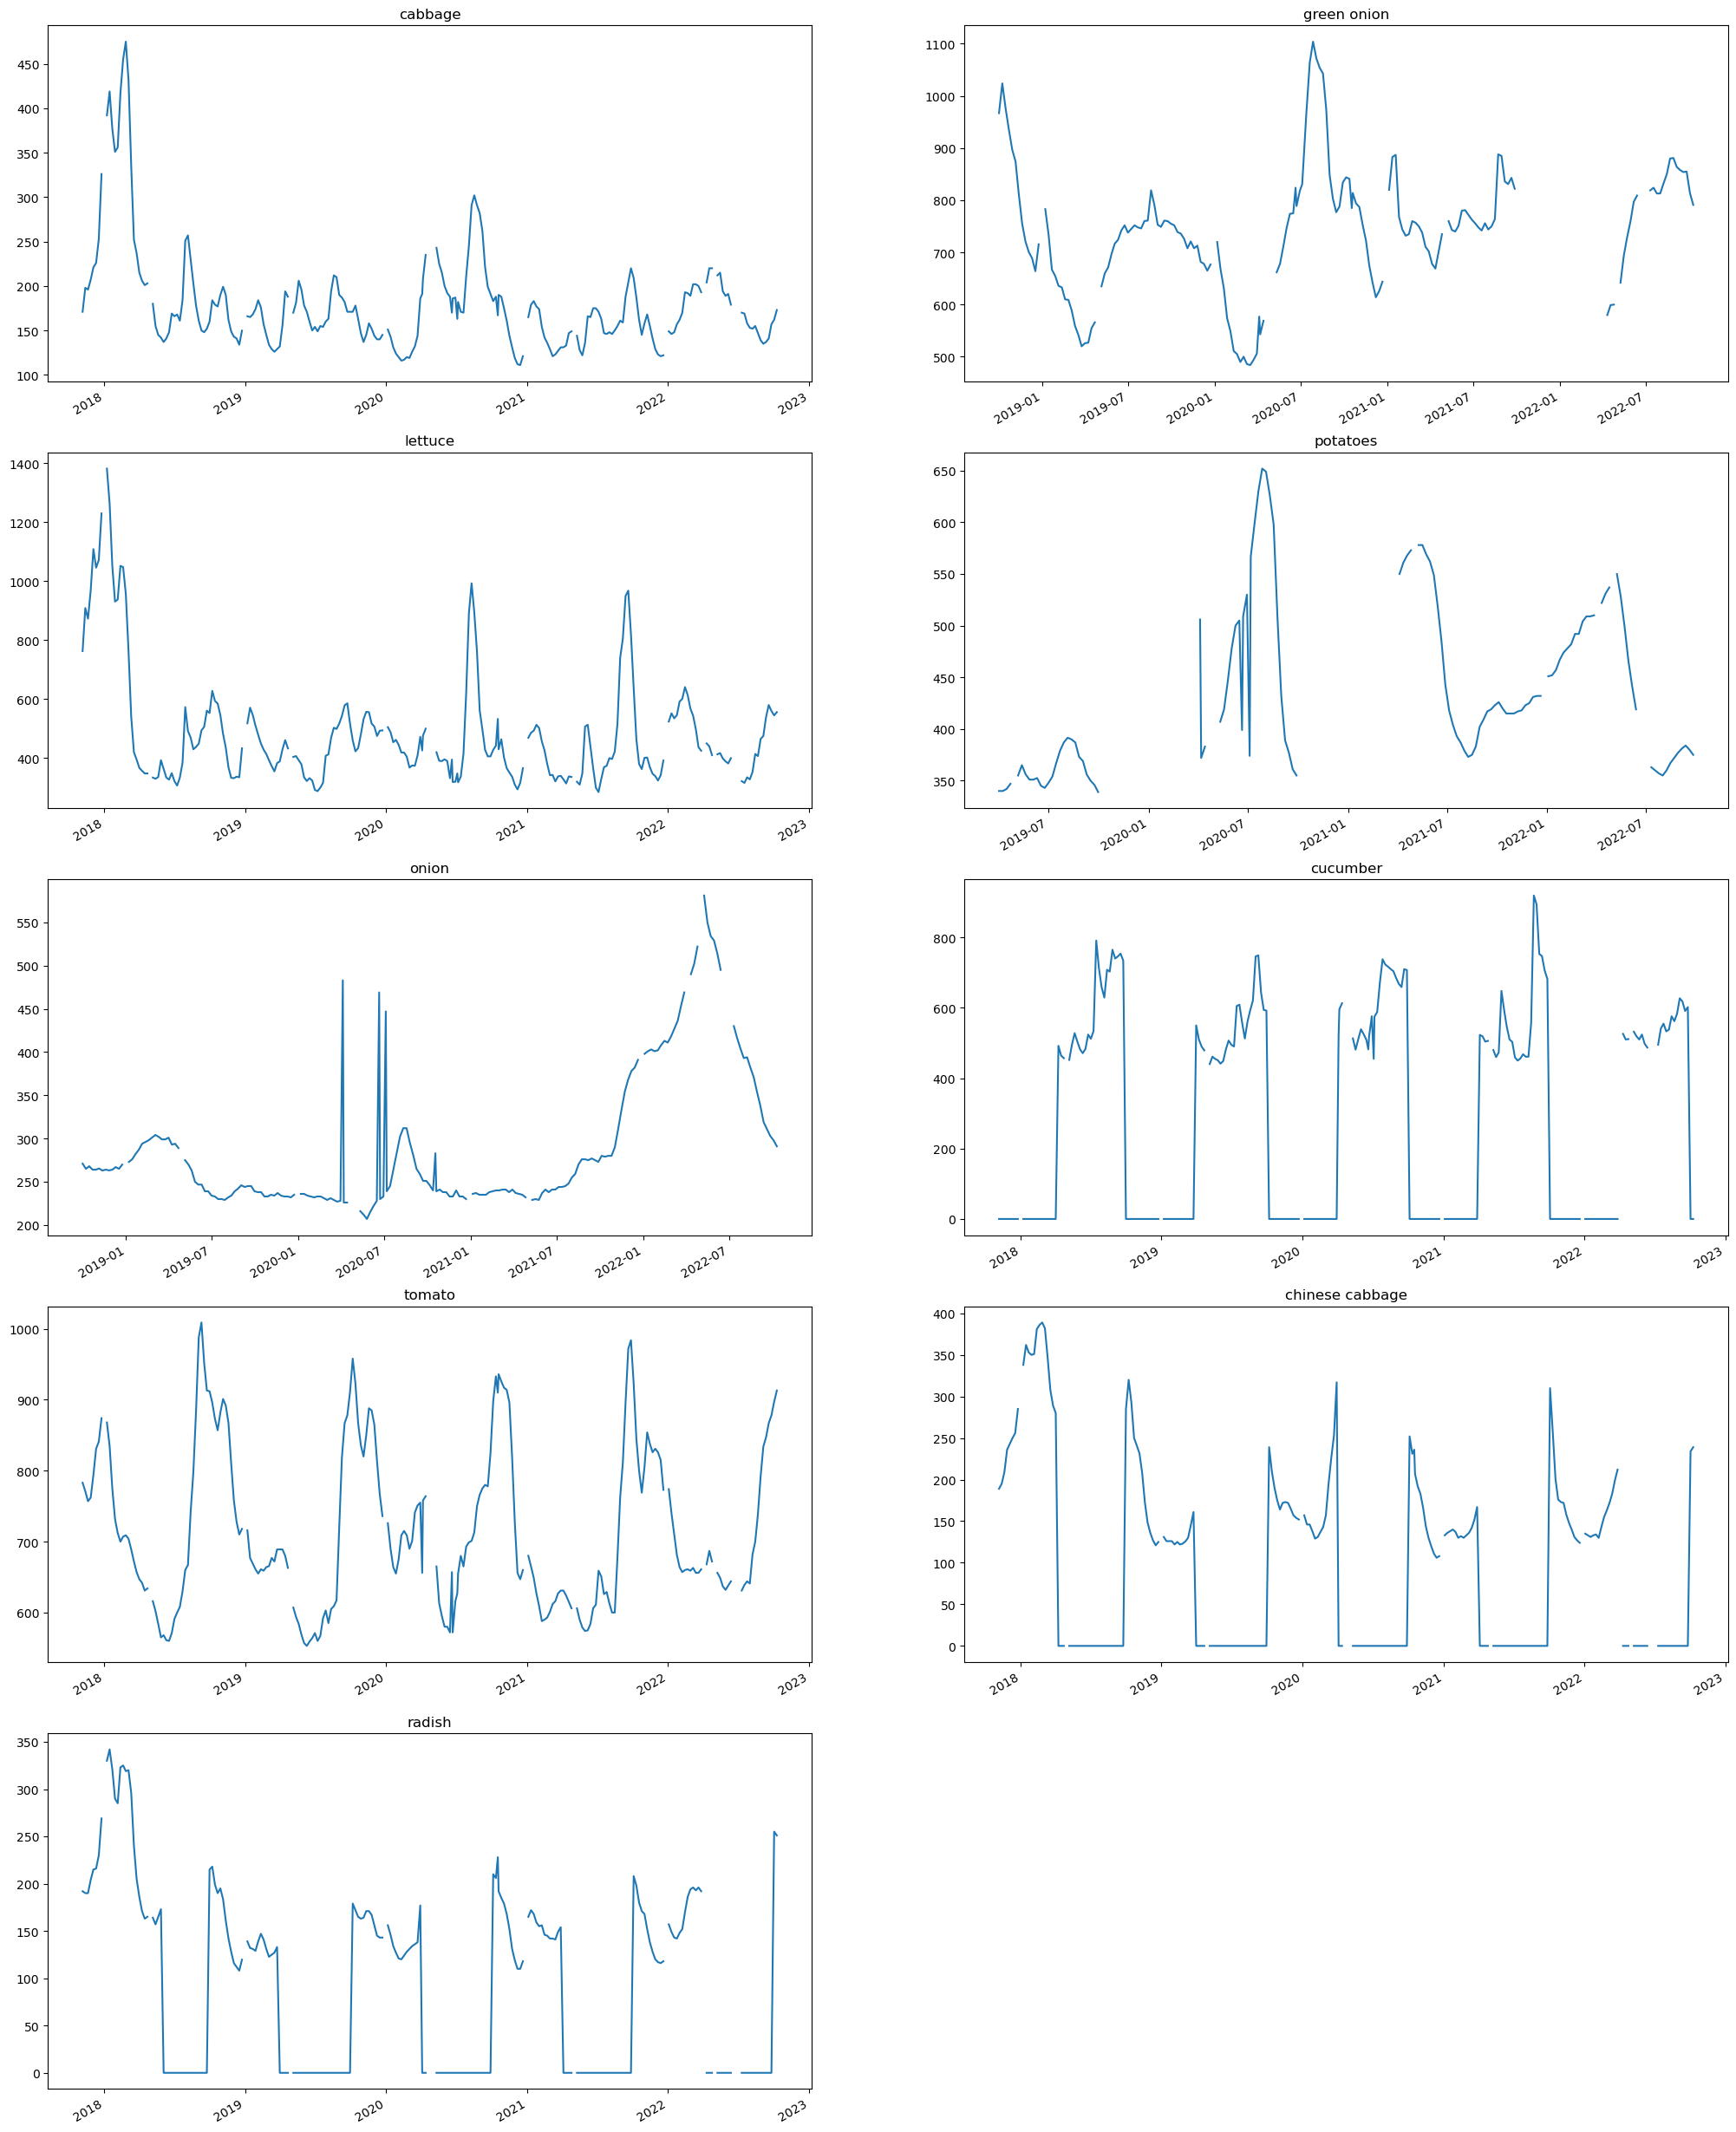

In [420]:
# define figure
plt.figure(figsize=(25,35))
idx = 1

# plot histogram for all the columns
for col_name in df.columns:
    plt.subplot(5, 2, idx)
    df[col_name].plot()
    plt.title(col_name)

    idx += 1

plt.show()

#### iv. find correlation between the vegetables

<Figure size 1000x1000 with 0 Axes>

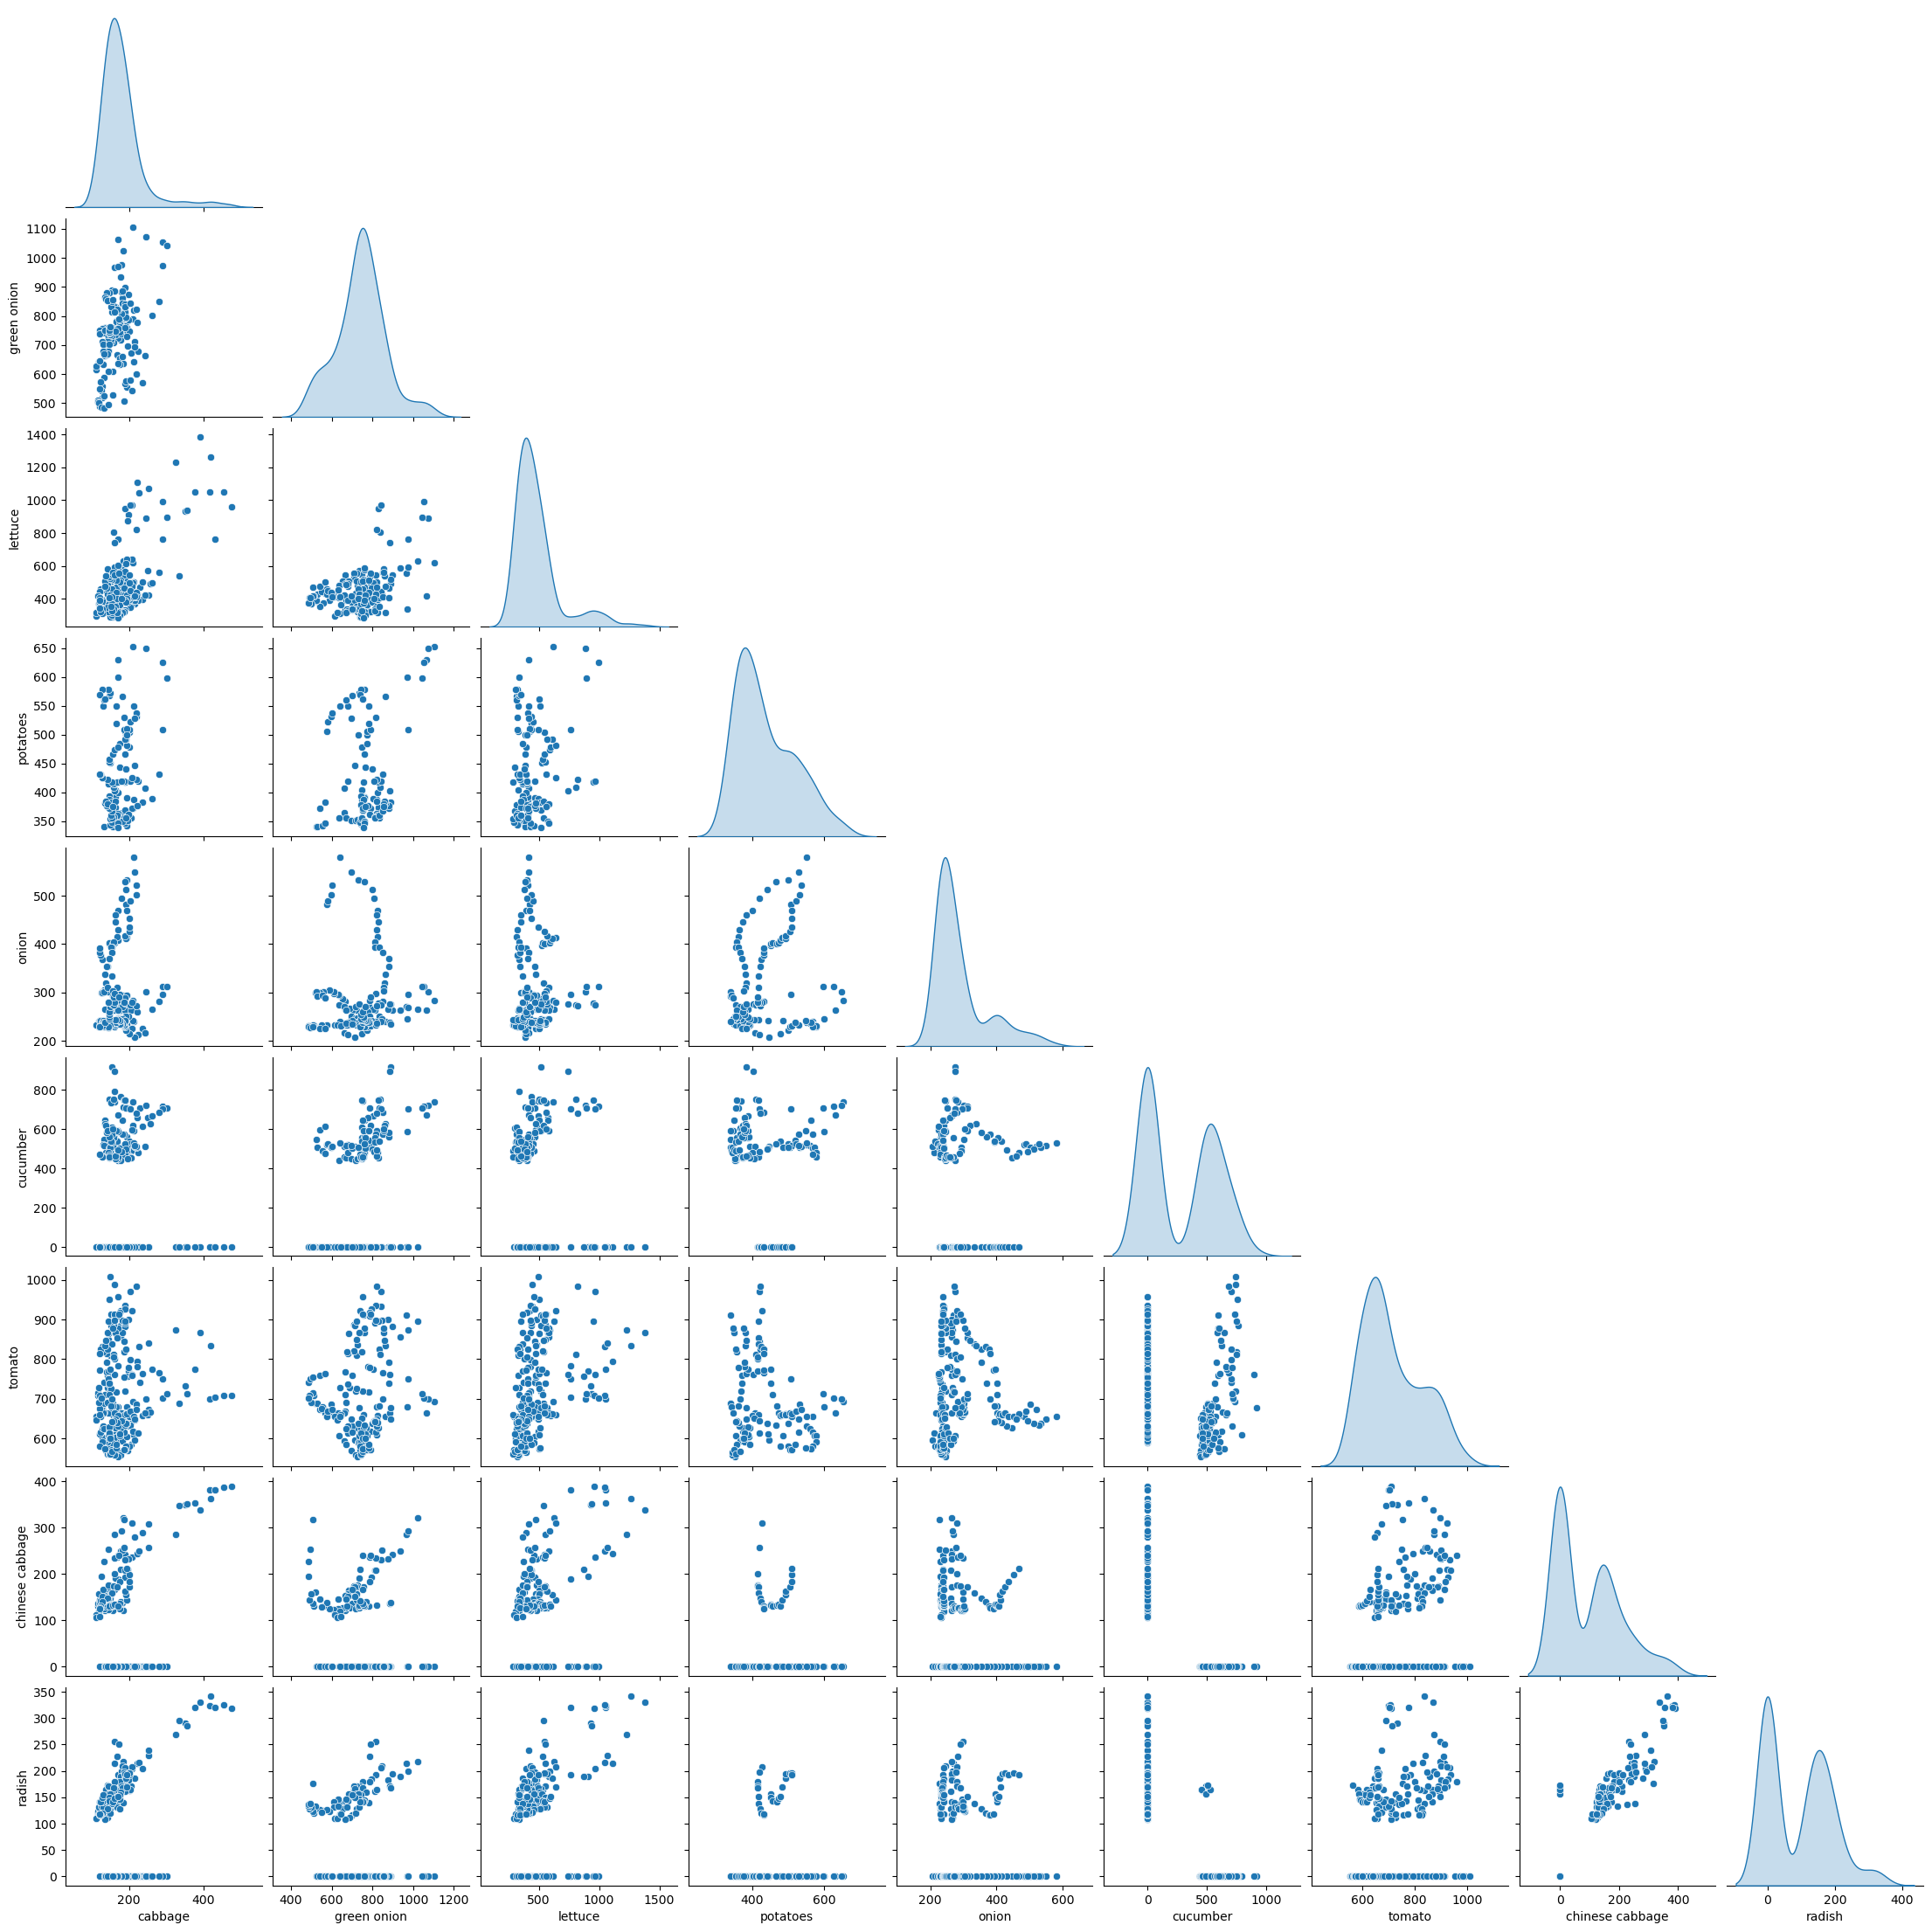

In [421]:
plt.figure(figsize=(10,10))

# sns.pairplot(data=df, corner=True, diag_kind='kde',
#             height=4, aspect=0.8)
sns.pairplot(data=df, corner=True, diag_kind='kde')

plt.show()

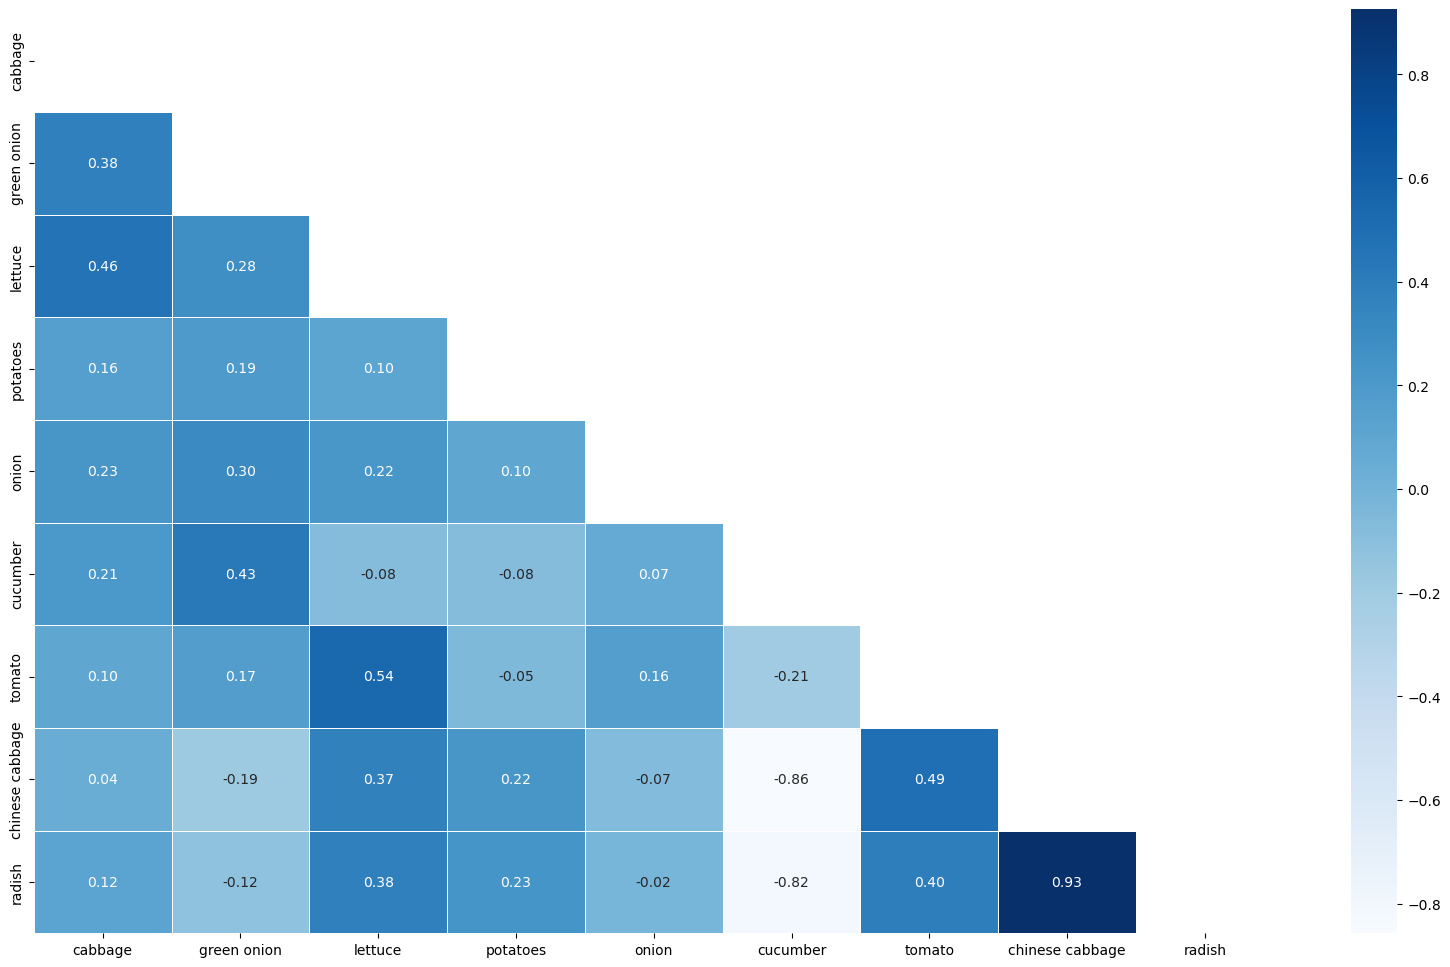

In [422]:
# find Spearman correlation of the independent variables
spearman_corr = df.corr(method='spearman')

# build mask to have only lower triangle of the correlation matrix
mask = np.triu(spearman_corr)

plt.figure(figsize=(20,12))
sns.heatmap(spearman_corr,  mask=mask, annot=True, cmap="Blues",
            fmt='.2f', linewidth=.5)

plt.show()

Major Observations:
1. `chinese cabbage` and `cucumber` have very high positive and very high negative correlation with `radish` respectively.
2. `chinese cabbage` and `cucumber` have very high negative correlation.
3. Other than the above, there is no significant correlation in the prices between the other vegetables.

#### v. Anomaly analysis using Z-Score

By analysing the Z-score, we can detect anomalies in time-series data.

However, since time-series is a form of sequential data, we have to be careful while finding the Z-scores
- as we have to compare values across comparable time of the year in case of seasonal data.

From the above plots, we have:
1. Vegetables without Seasonal price trend:
   - Cabbage
   - Green Onion
   - Lettuce
   - Potatoes
   - Onion
 - For these vegetables we will use a rolling lookback window to calculate the mean and standard deviation
2. Vegetables with Seasonal price trend:
   - Cucumber
   - Tomato
   - Chinese Cabbage
   - Radish
 - For these vegetables, we will find prices for similar weeks across the years 

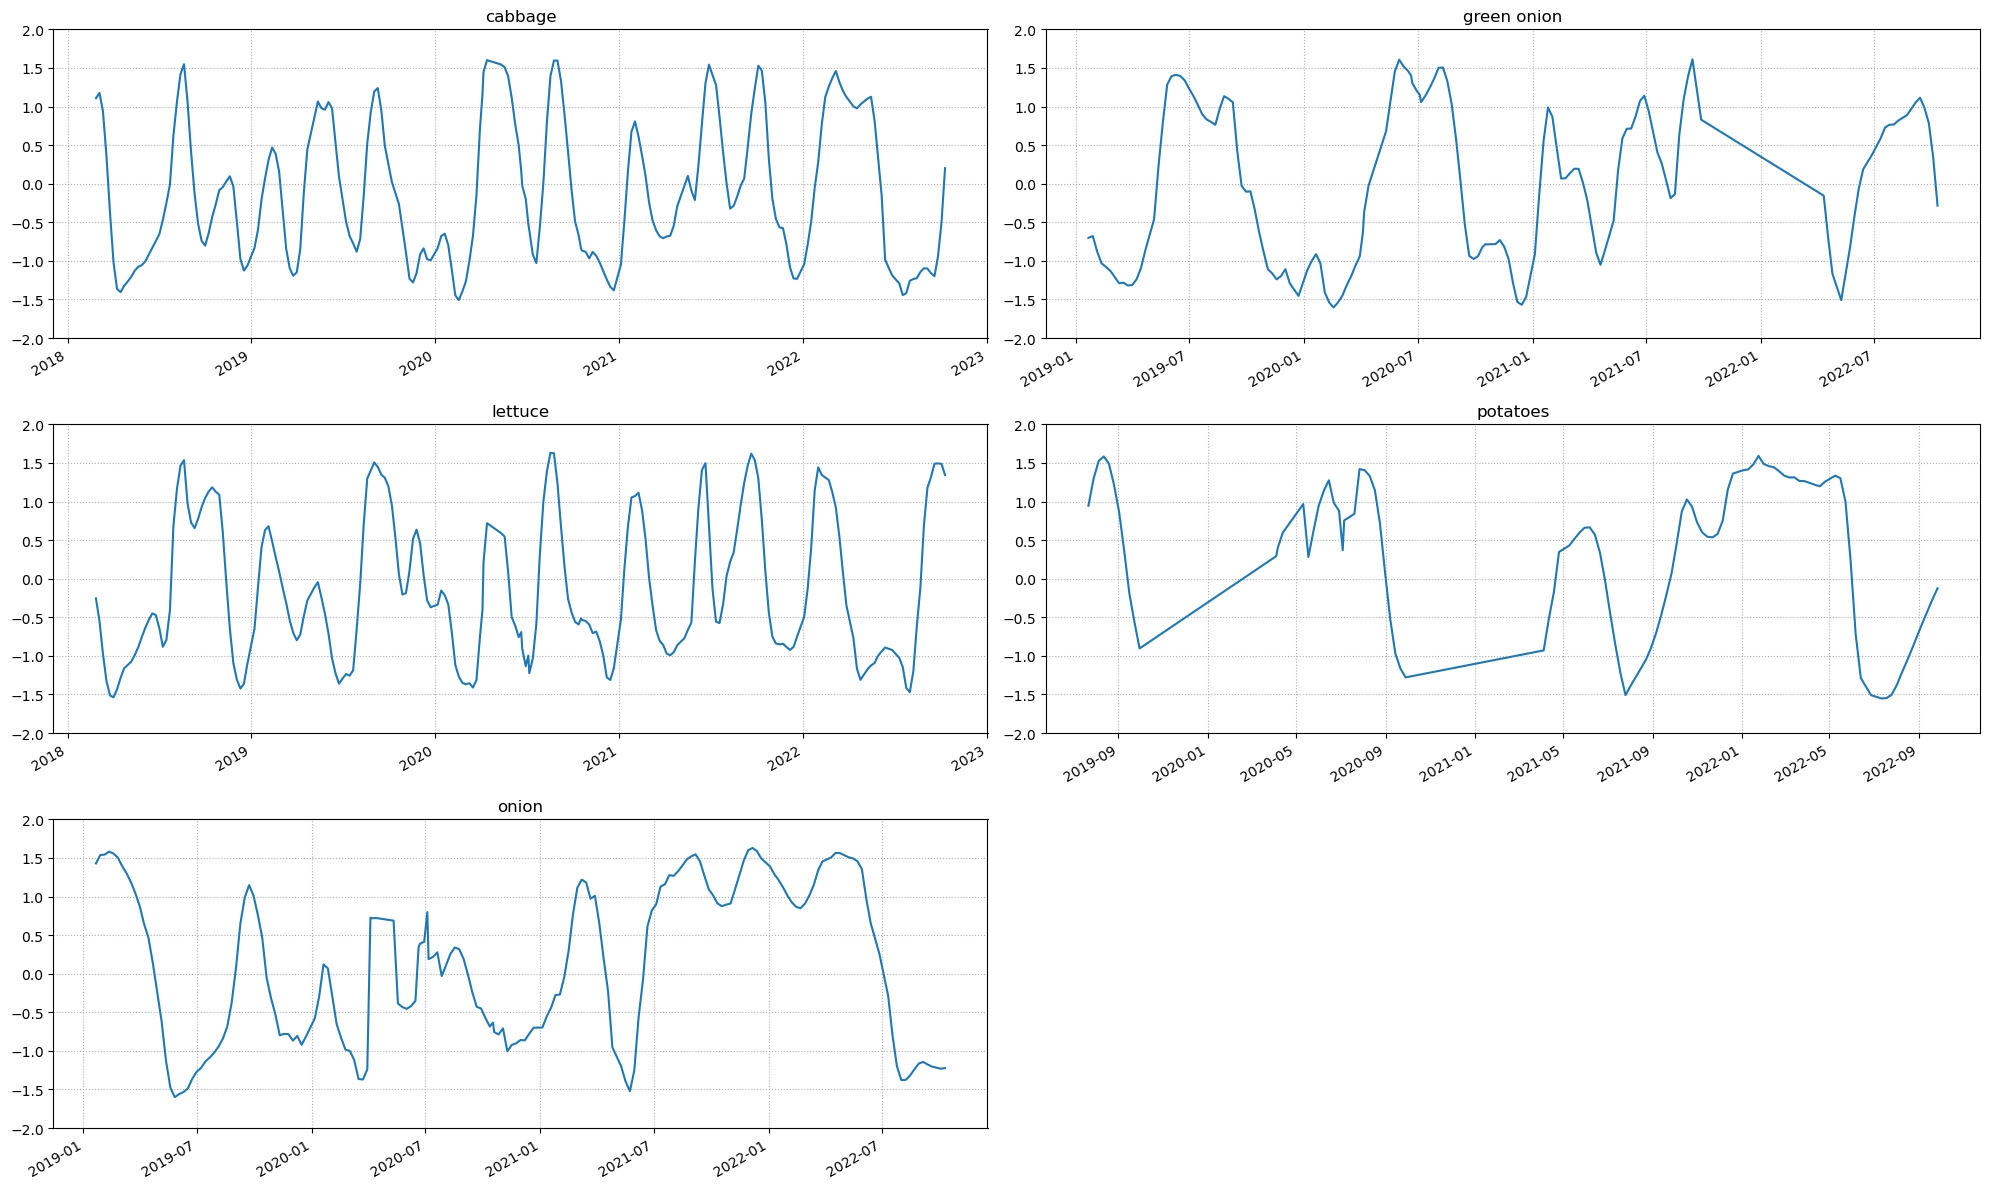

In [423]:
# list of non-seasonally priced vegetables
non_seasonal = ['cabbage', 'green onion', 'lettuce', 'potatoes', 'onion']

# params for rolling window based Z-scores
lookback = 16
smoothing = 4

# define figure
plt.figure(figsize=(20,12))
idx = 1

for veg in non_seasonal:
    plt.subplot(3, 2, idx)

    tmp_df = df.dropna(subset=[veg])

    result = pd.DataFrame()
    
    # calculate rolling mean and standard deviation
    result['mean'] = tmp_df[veg].rolling(window=lookback).mean(min_period=lookback)
    result['std_dev'] = tmp_df[veg].rolling(window=lookback).std(min_period=lookback, ddof=0)

    # calculate z-score based on the above mean and standard deviation
    result['z_score'] = (tmp_df[veg].rolling(window=smoothing).mean() - result['mean']) / result['std_dev']

    # plot the results
    result['z_score'].plot()
    plt.title(veg)
    plt.ylim(-2, 2)
    plt.grid(visible=True, linestyle=':')
    plt.tight_layout()

    idx += 1

plt.show()
del tmp_df, result

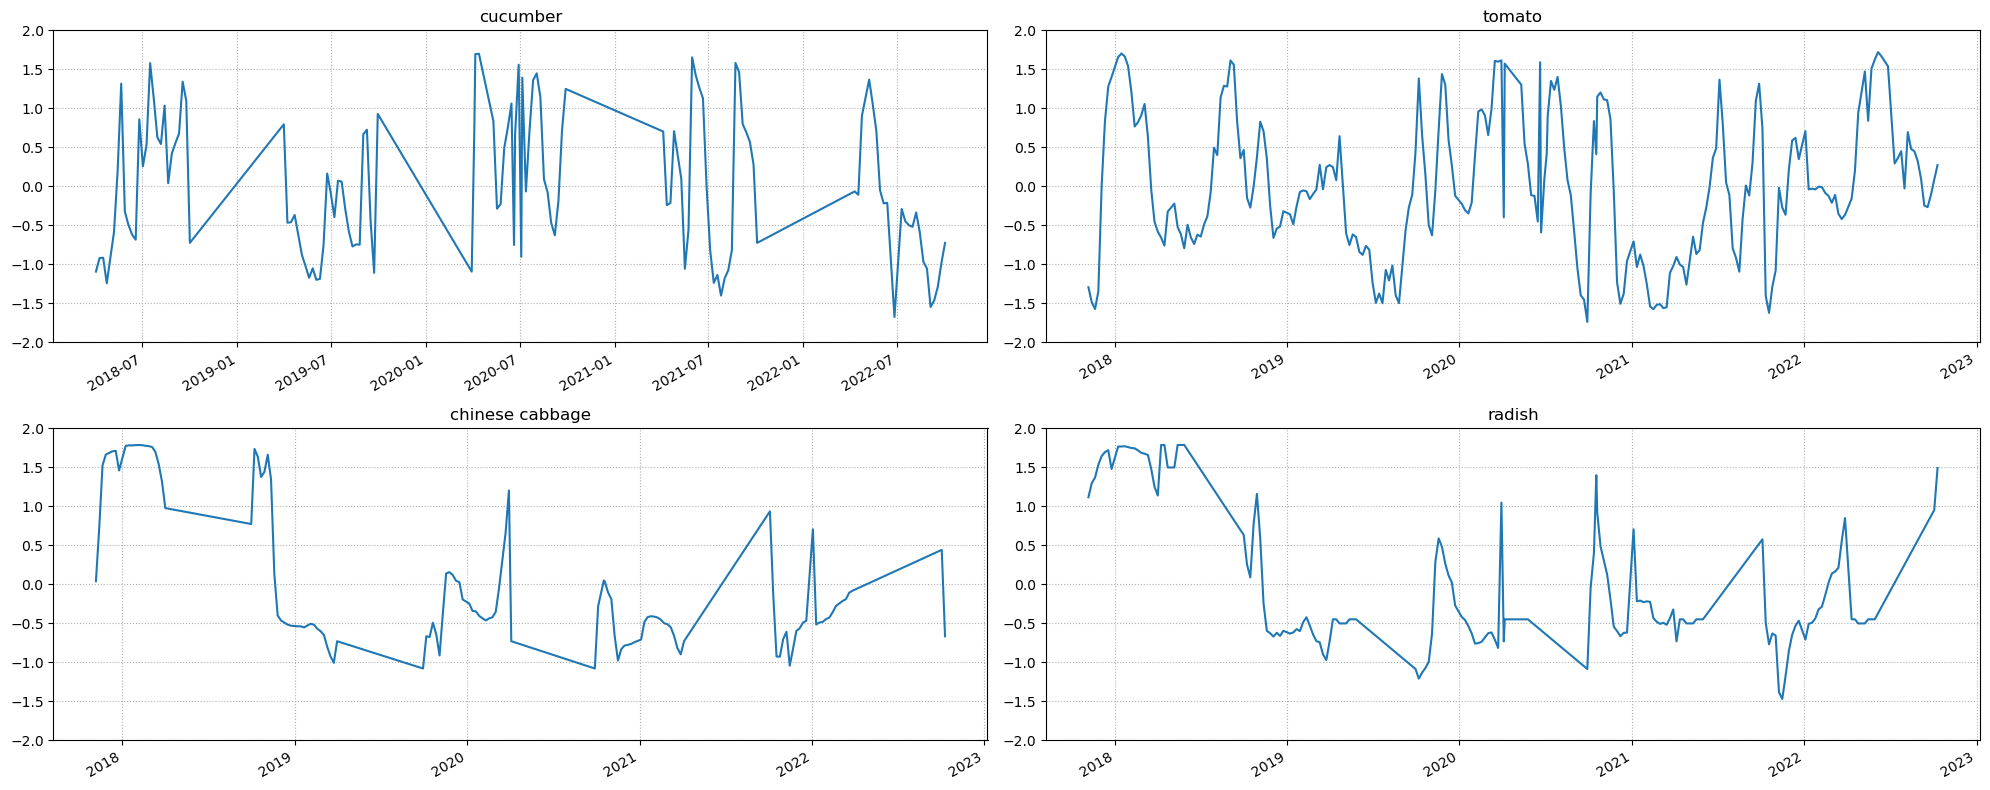

In [424]:
# list of seasonally priced vegetables
seasonal = ['cucumber', 'tomato', 'chinese cabbage', 'radish']

tmp_df = df[df.columns[df.columns.isin(seasonal)]].copy(deep=True)

# calculate mean and standard deviation across similar weeks of the year
mean_ts = tmp_df.groupby(by=[tmp_df.index.isocalendar().week]).aggregate(np.nanmean)
std_dev_ts = tmp_df.groupby(by=[tmp_df.index.isocalendar().week]).aggregate(np.nanstd)

# calculate z-score considering mean and standard deviation from similar weeks across the years
result = tmp_df.copy()
for y in np.unique(tmp_df.index.year):
    for d in np.unique(tmp_df.index.isocalendar().week):
        result[(tmp_df.index.year==y) & (tmp_df.index.isocalendar().week==d)] = (tmp_df[(tmp_df.index.year==y) & (tmp_df.index.isocalendar().week==d)]- mean_ts.loc[d])/std_dev_ts.loc[d]


# define figure
plt.figure(figsize=(20,8))
idx = 1

for veg in result.columns:
    plt.subplot(2, 2, idx)

    tmp_df = result.dropna(subset=[veg])

    # plot the results
    tmp_df[veg].plot()
    plt.title(veg)
    plt.ylim(-2, 2)
    plt.grid(visible=True, linestyle=':')
    plt.tight_layout()

    idx += 1

plt.show()
del tmp_df, result

From the above plots for Z-score, we can say that we do not have anomalies in our time-series data
- For all the vegetables, all the data points lies within 2 standard deviations from the mean.

#### vi. Interpolate using different methods

**Linear Interpolation**

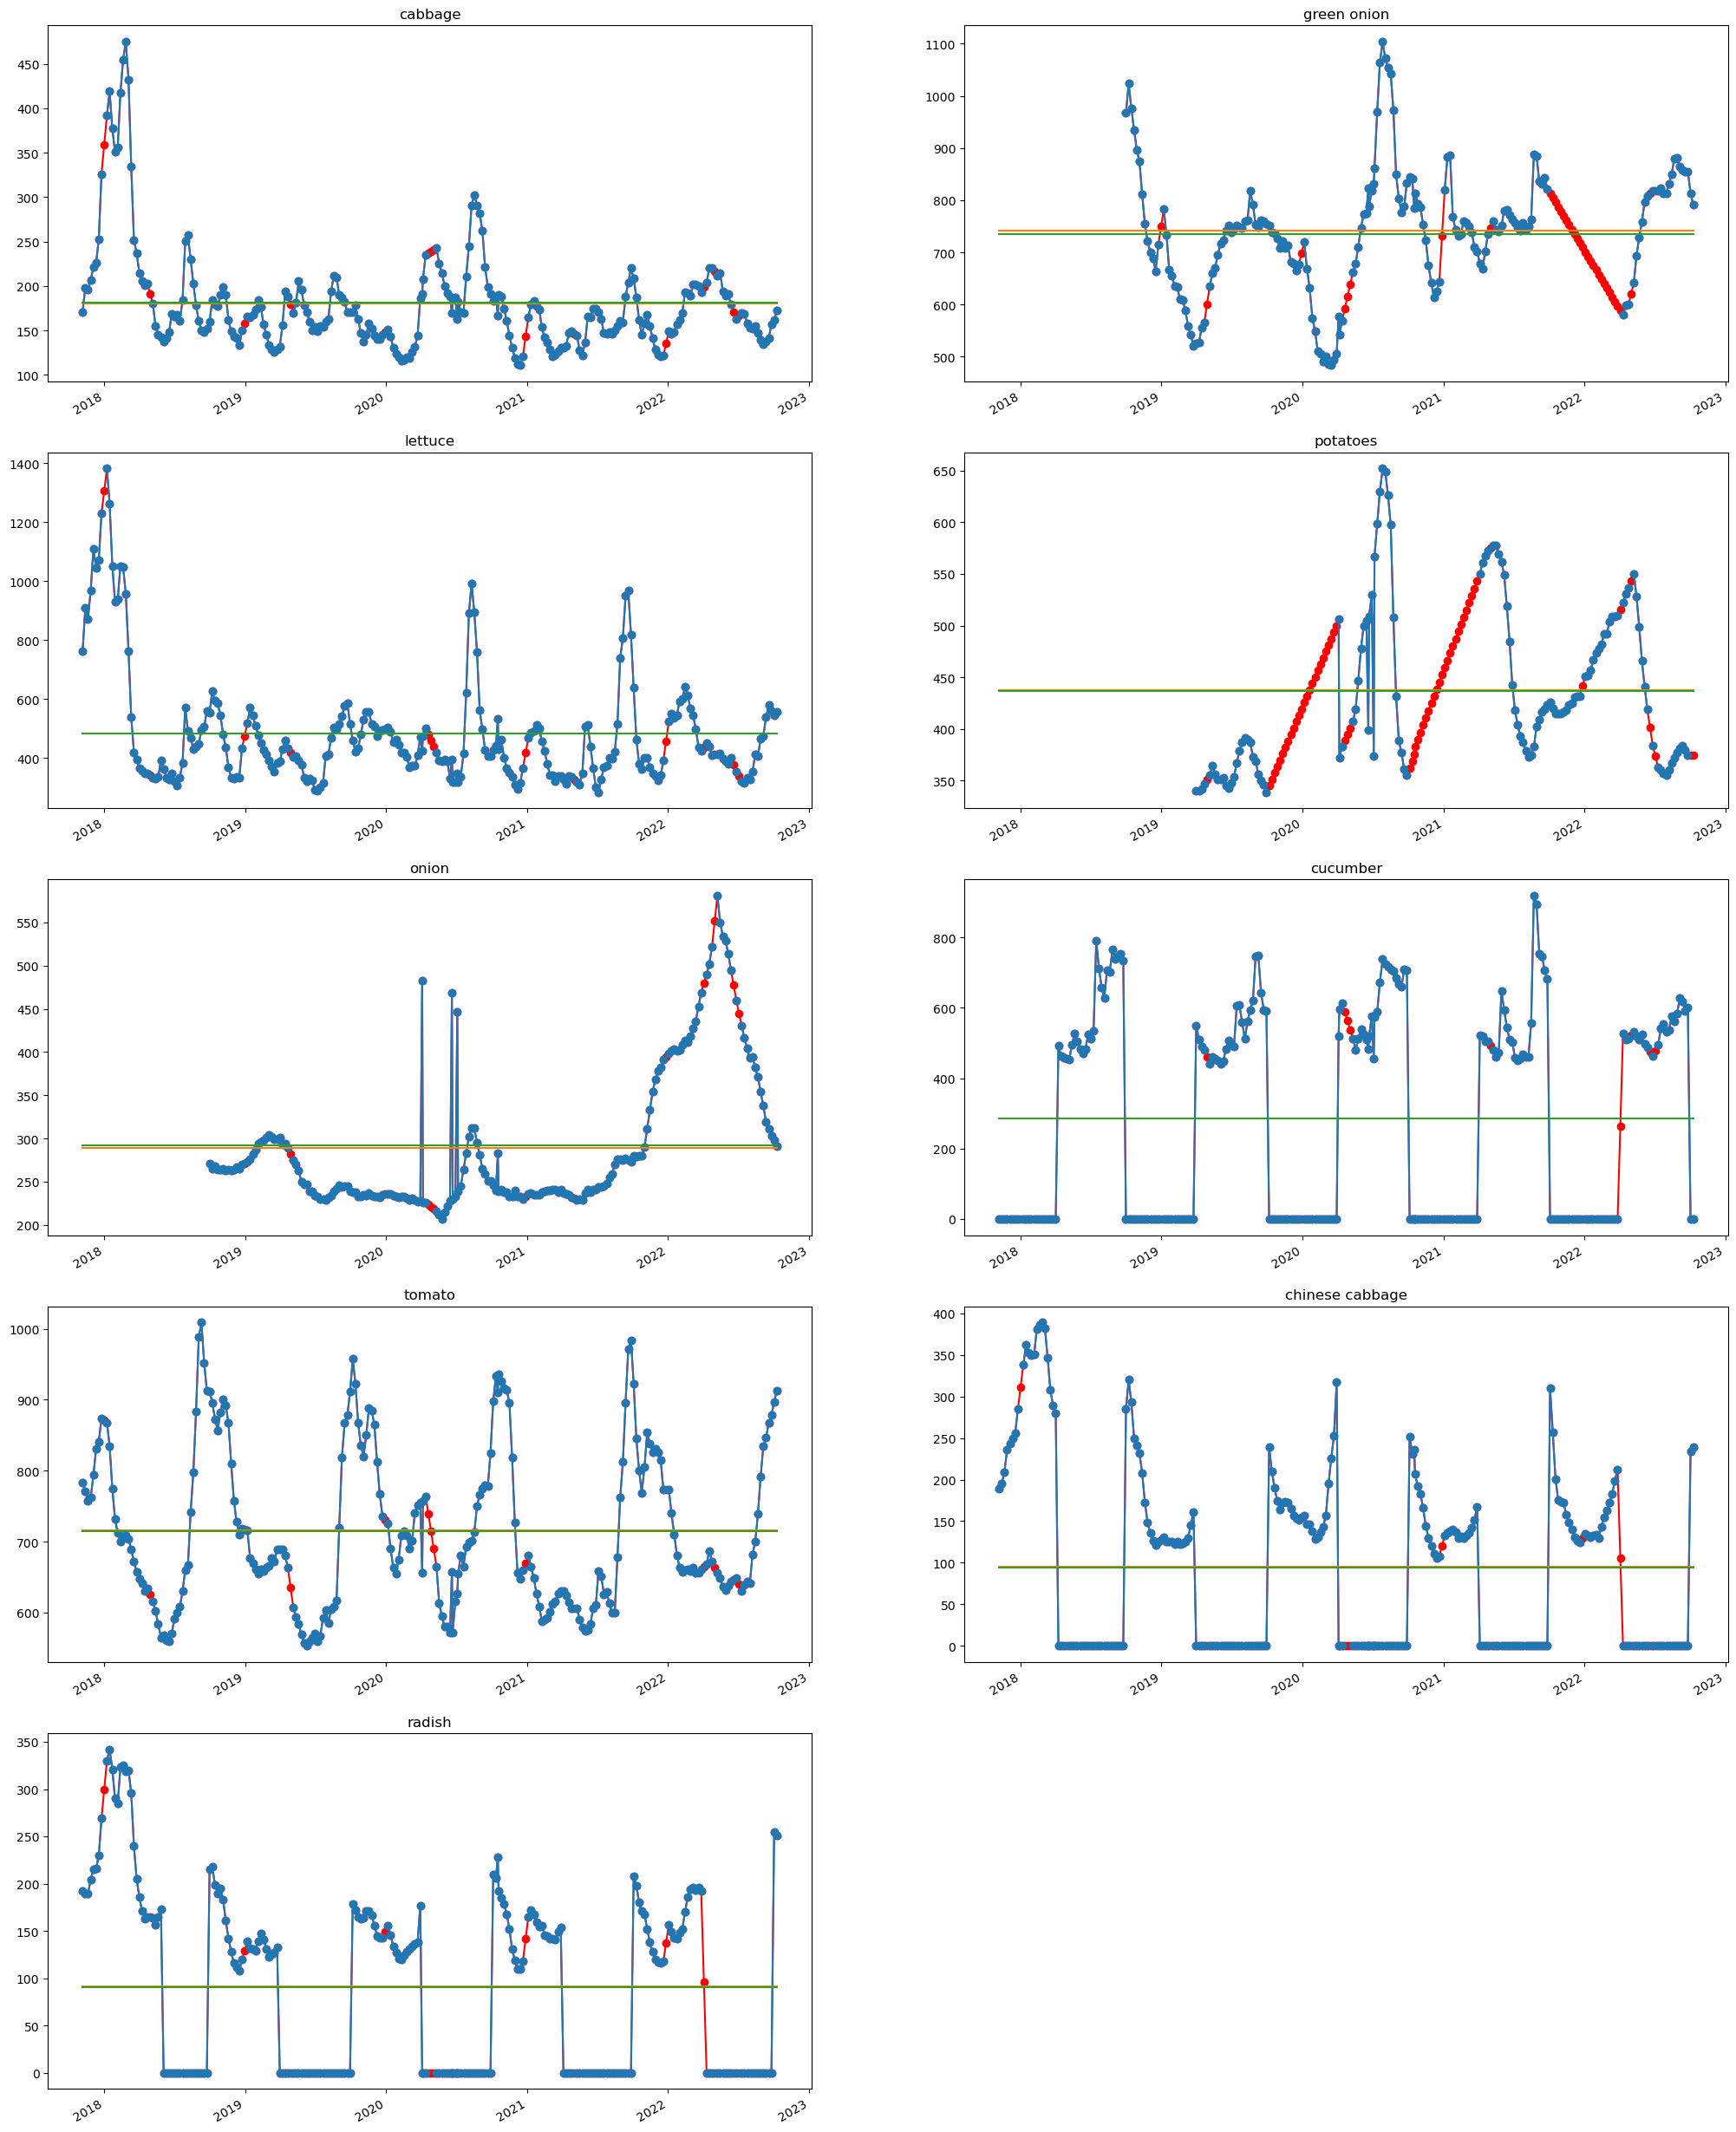

In [425]:
# create a copy of the dataset
tmp_df = df.copy()

# apply interpolation
tmp_df = df.interpolate()

# define figure
plt.figure(figsize=(25,35))
idx = 1

# plot histogram for all the columns
for col_name in df.columns:
    plt.subplot(5, 2, idx)
    tmp_df[col_name].plot(color='red', marker='o')
    df[col_name].plot(marker='o')
    plt.title(col_name)

    col_mean_orig = df[col_name].mean()
    col_mean_imp = tmp_df[col_name].mean()
    sns.lineplot(x=df.index, y=col_mean_orig, legend=False)
    sns.lineplot(x=df.index, y=col_mean_imp, legend=False)

    idx += 1

plt.show()

**Time Interpolation**

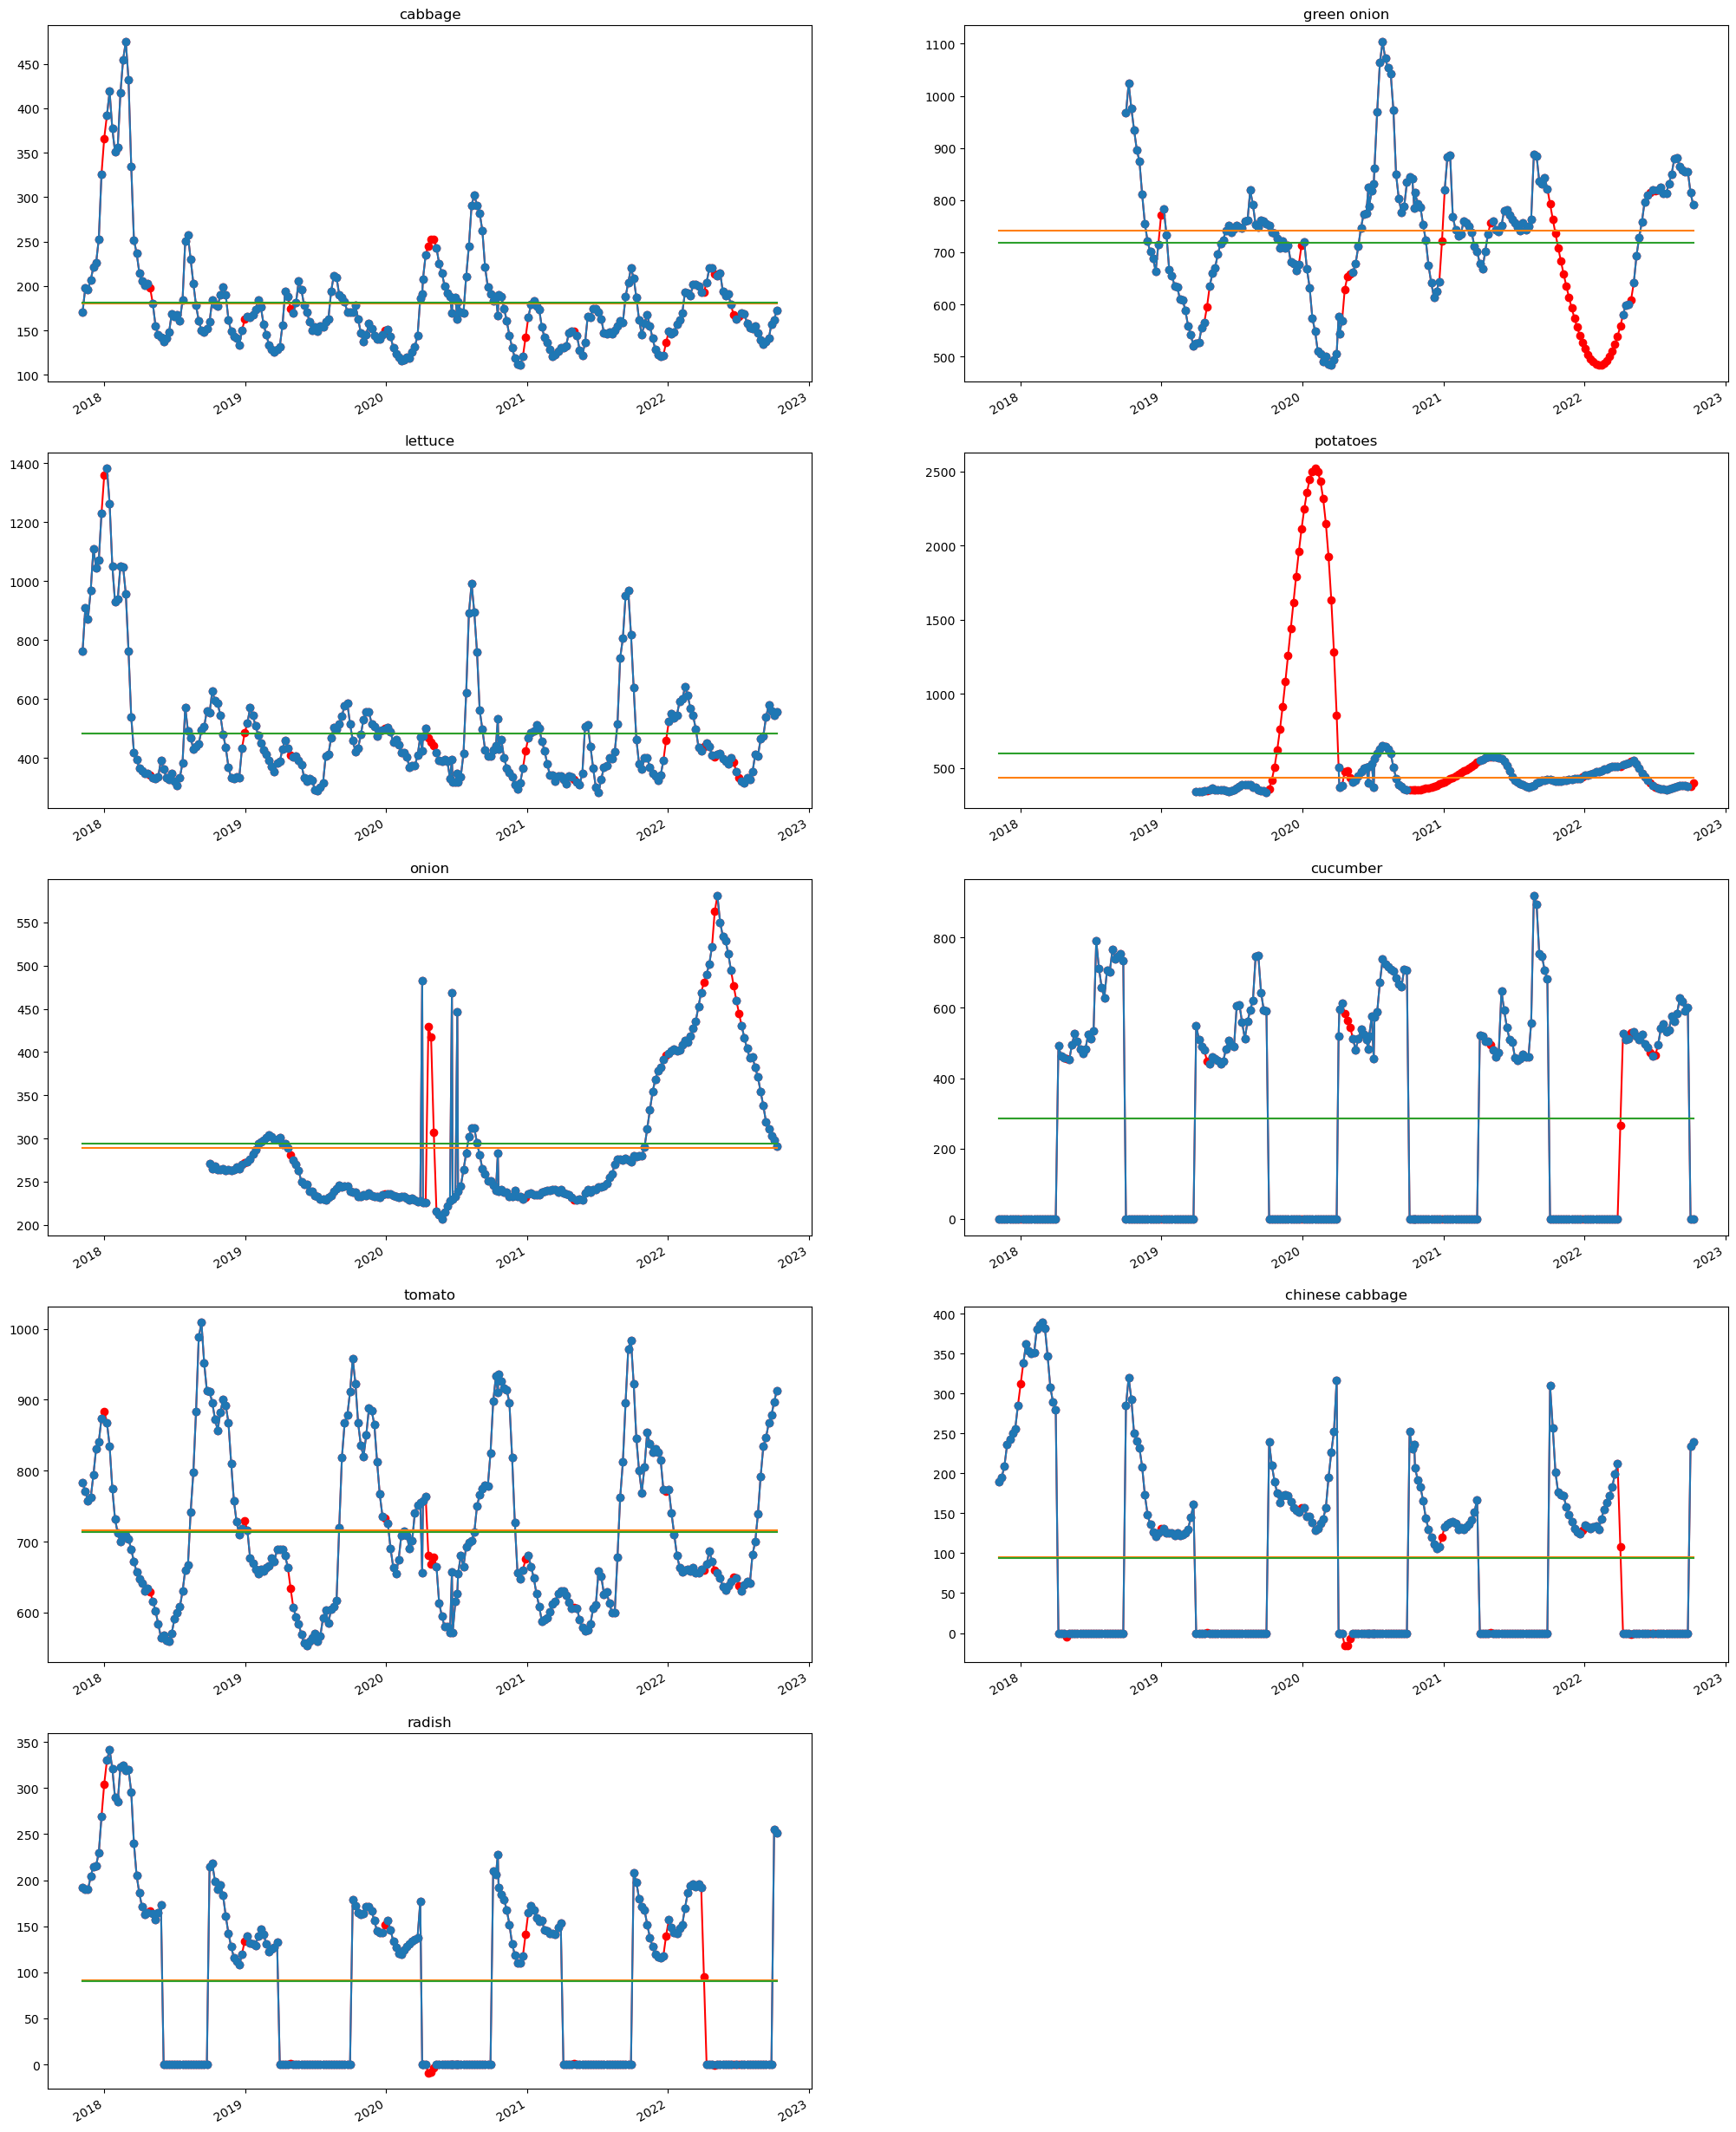

In [426]:
# create a copy of the dataset
tmp_df = df.copy()

# apply interpolation
tmp_df = df.interpolate(method='cubicspline', order=3)

# define figure
plt.figure(figsize=(25,35))
idx = 1

# plot histogram for all the columns
for col_name in df.columns:
    plt.subplot(5, 2, idx)
    tmp_df[col_name].plot(color='red', marker='o')
    df[col_name].plot(marker='o')
    plt.title(col_name)

    col_mean_orig = df[col_name].mean()
    col_mean_imp = tmp_df[col_name].mean()
    sns.lineplot(x=df.index, y=col_mean_orig, legend=False)
    sns.lineplot(x=df.index, y=col_mean_imp, legend=False)
    
    idx += 1

plt.show()

**Spline Interpolation**

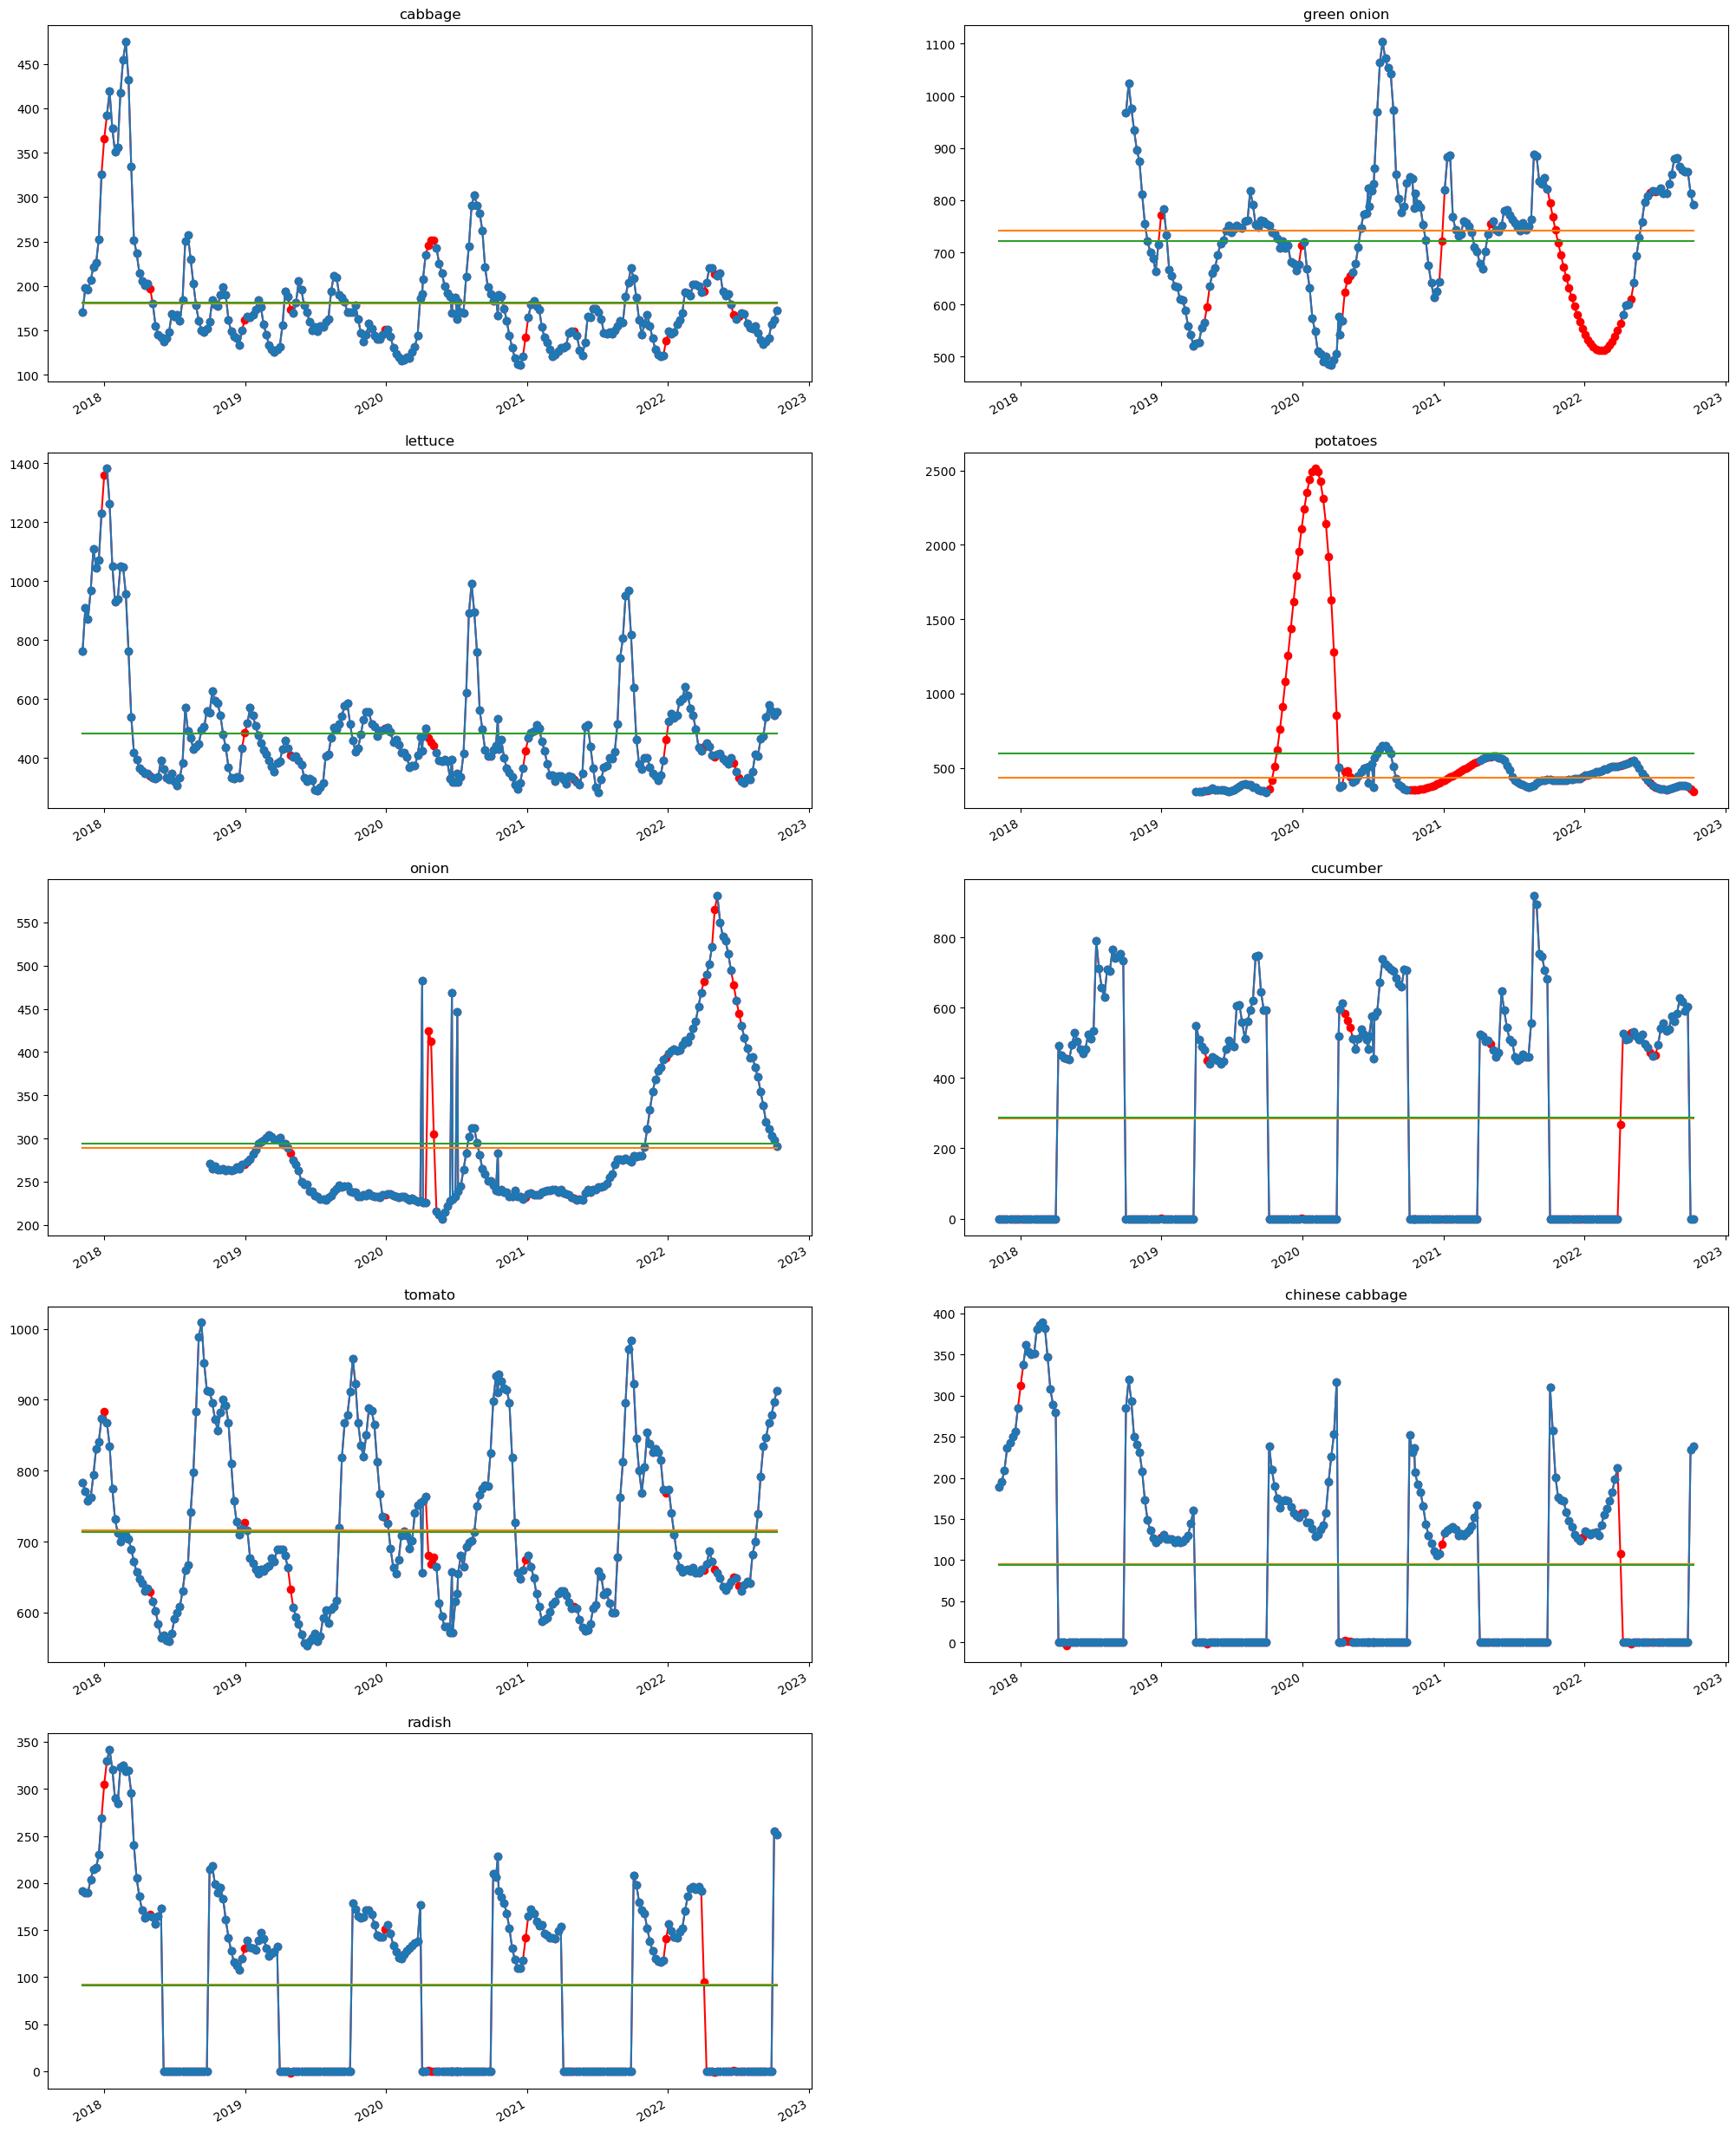

In [427]:
# create a copy of the dataset
tmp_df = df.copy()

# apply interpolation
tmp_df = df.interpolate(method='spline', order=3)

# define figure
plt.figure(figsize=(25,35))
idx = 1

# plot histogram for all the columns
for col_name in df.columns:
    plt.subplot(5, 2, idx)
    tmp_df[col_name].plot(color='red', marker='o')
    df[col_name].plot(marker='o')
    plt.title(col_name)

    col_mean_orig = df[col_name].mean()
    col_mean_imp = tmp_df[col_name].mean()
    sns.lineplot(x=df.index, y=col_mean_orig, legend=False)
    sns.lineplot(x=df.index, y=col_mean_imp, legend=False)
    
    idx += 1

plt.show()

**akima Interpolation**

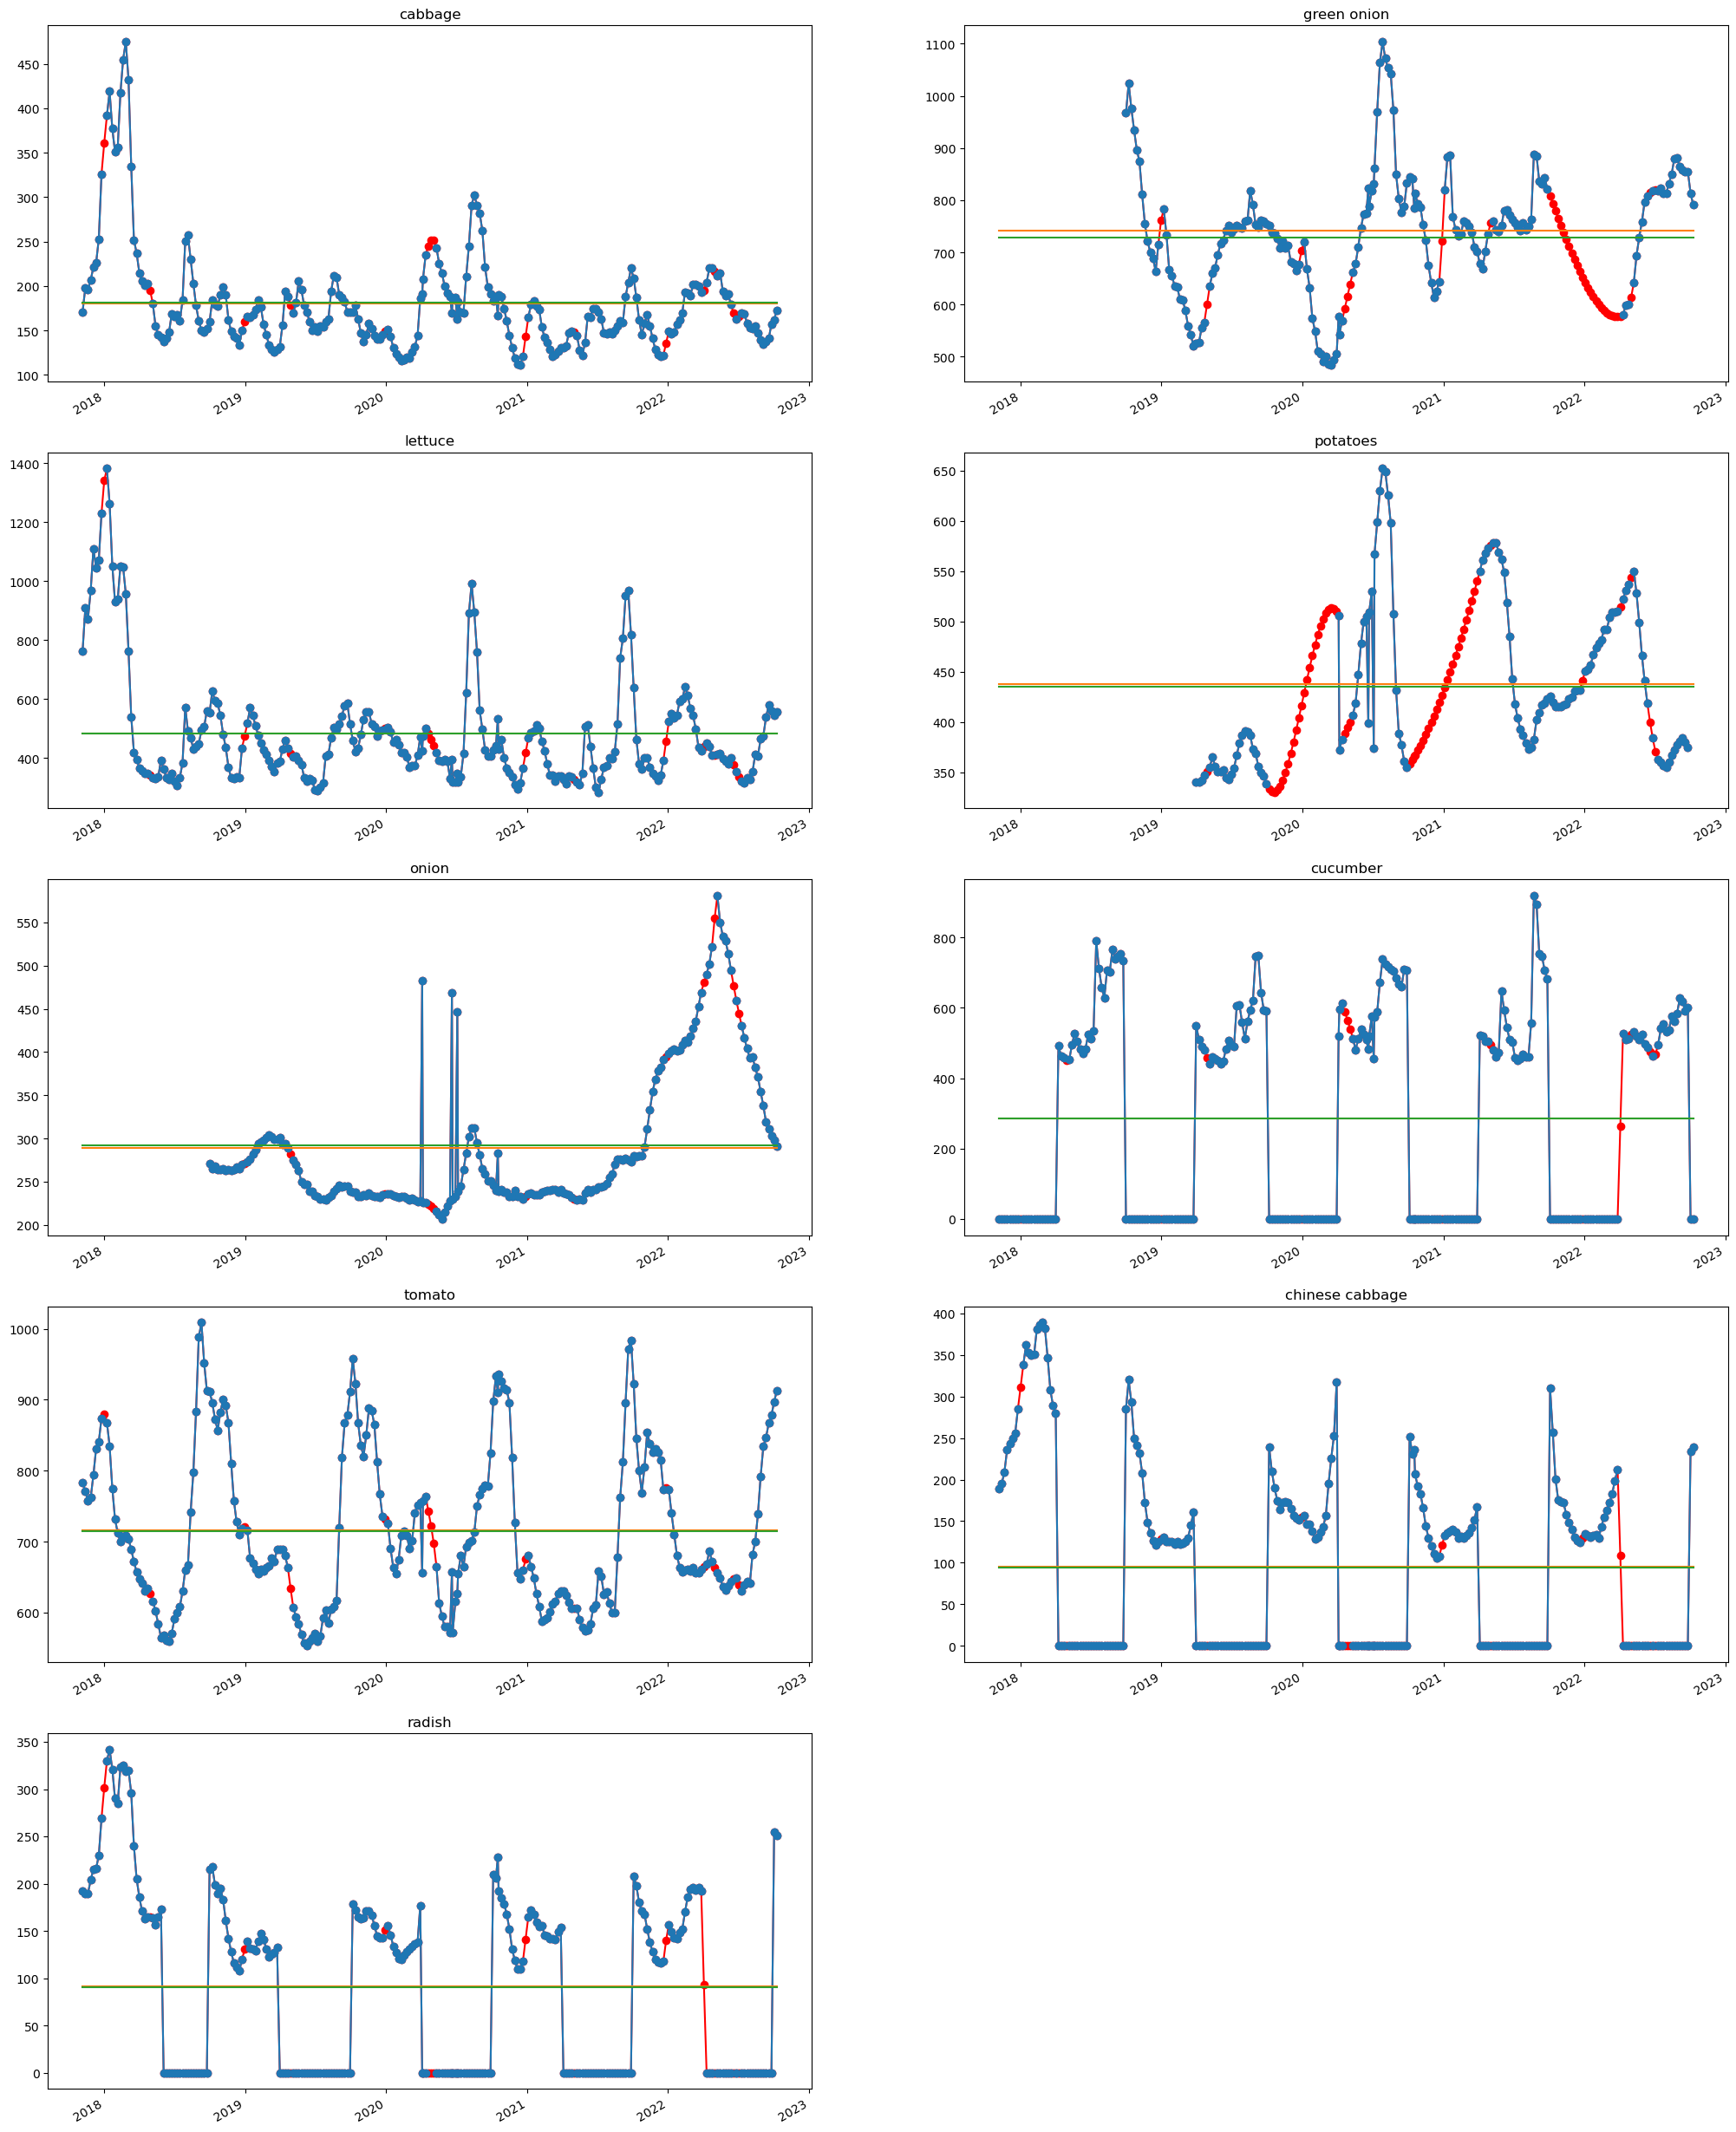

In [428]:
# create a copy of the dataset
tmp_df = df.copy()

# apply interpolation
tmp_df = df.interpolate(method='akima')

# define figure
plt.figure(figsize=(25,35))
idx = 1

# plot histogram for all the columns
for col_name in df.columns:
    plt.subplot(5, 2, idx)
    tmp_df[col_name].plot(color='red', marker='o')
    df[col_name].plot(marker='o')
    plt.title(col_name)

    col_mean_orig = df[col_name].mean()
    col_mean_imp = tmp_df[col_name].mean()
    sns.lineplot(x=df.index, y=col_mean_orig, legend=False)
    sns.lineplot(x=df.index, y=col_mean_imp, legend=False)
    
    idx += 1

plt.show()

**pchip Interpolation**

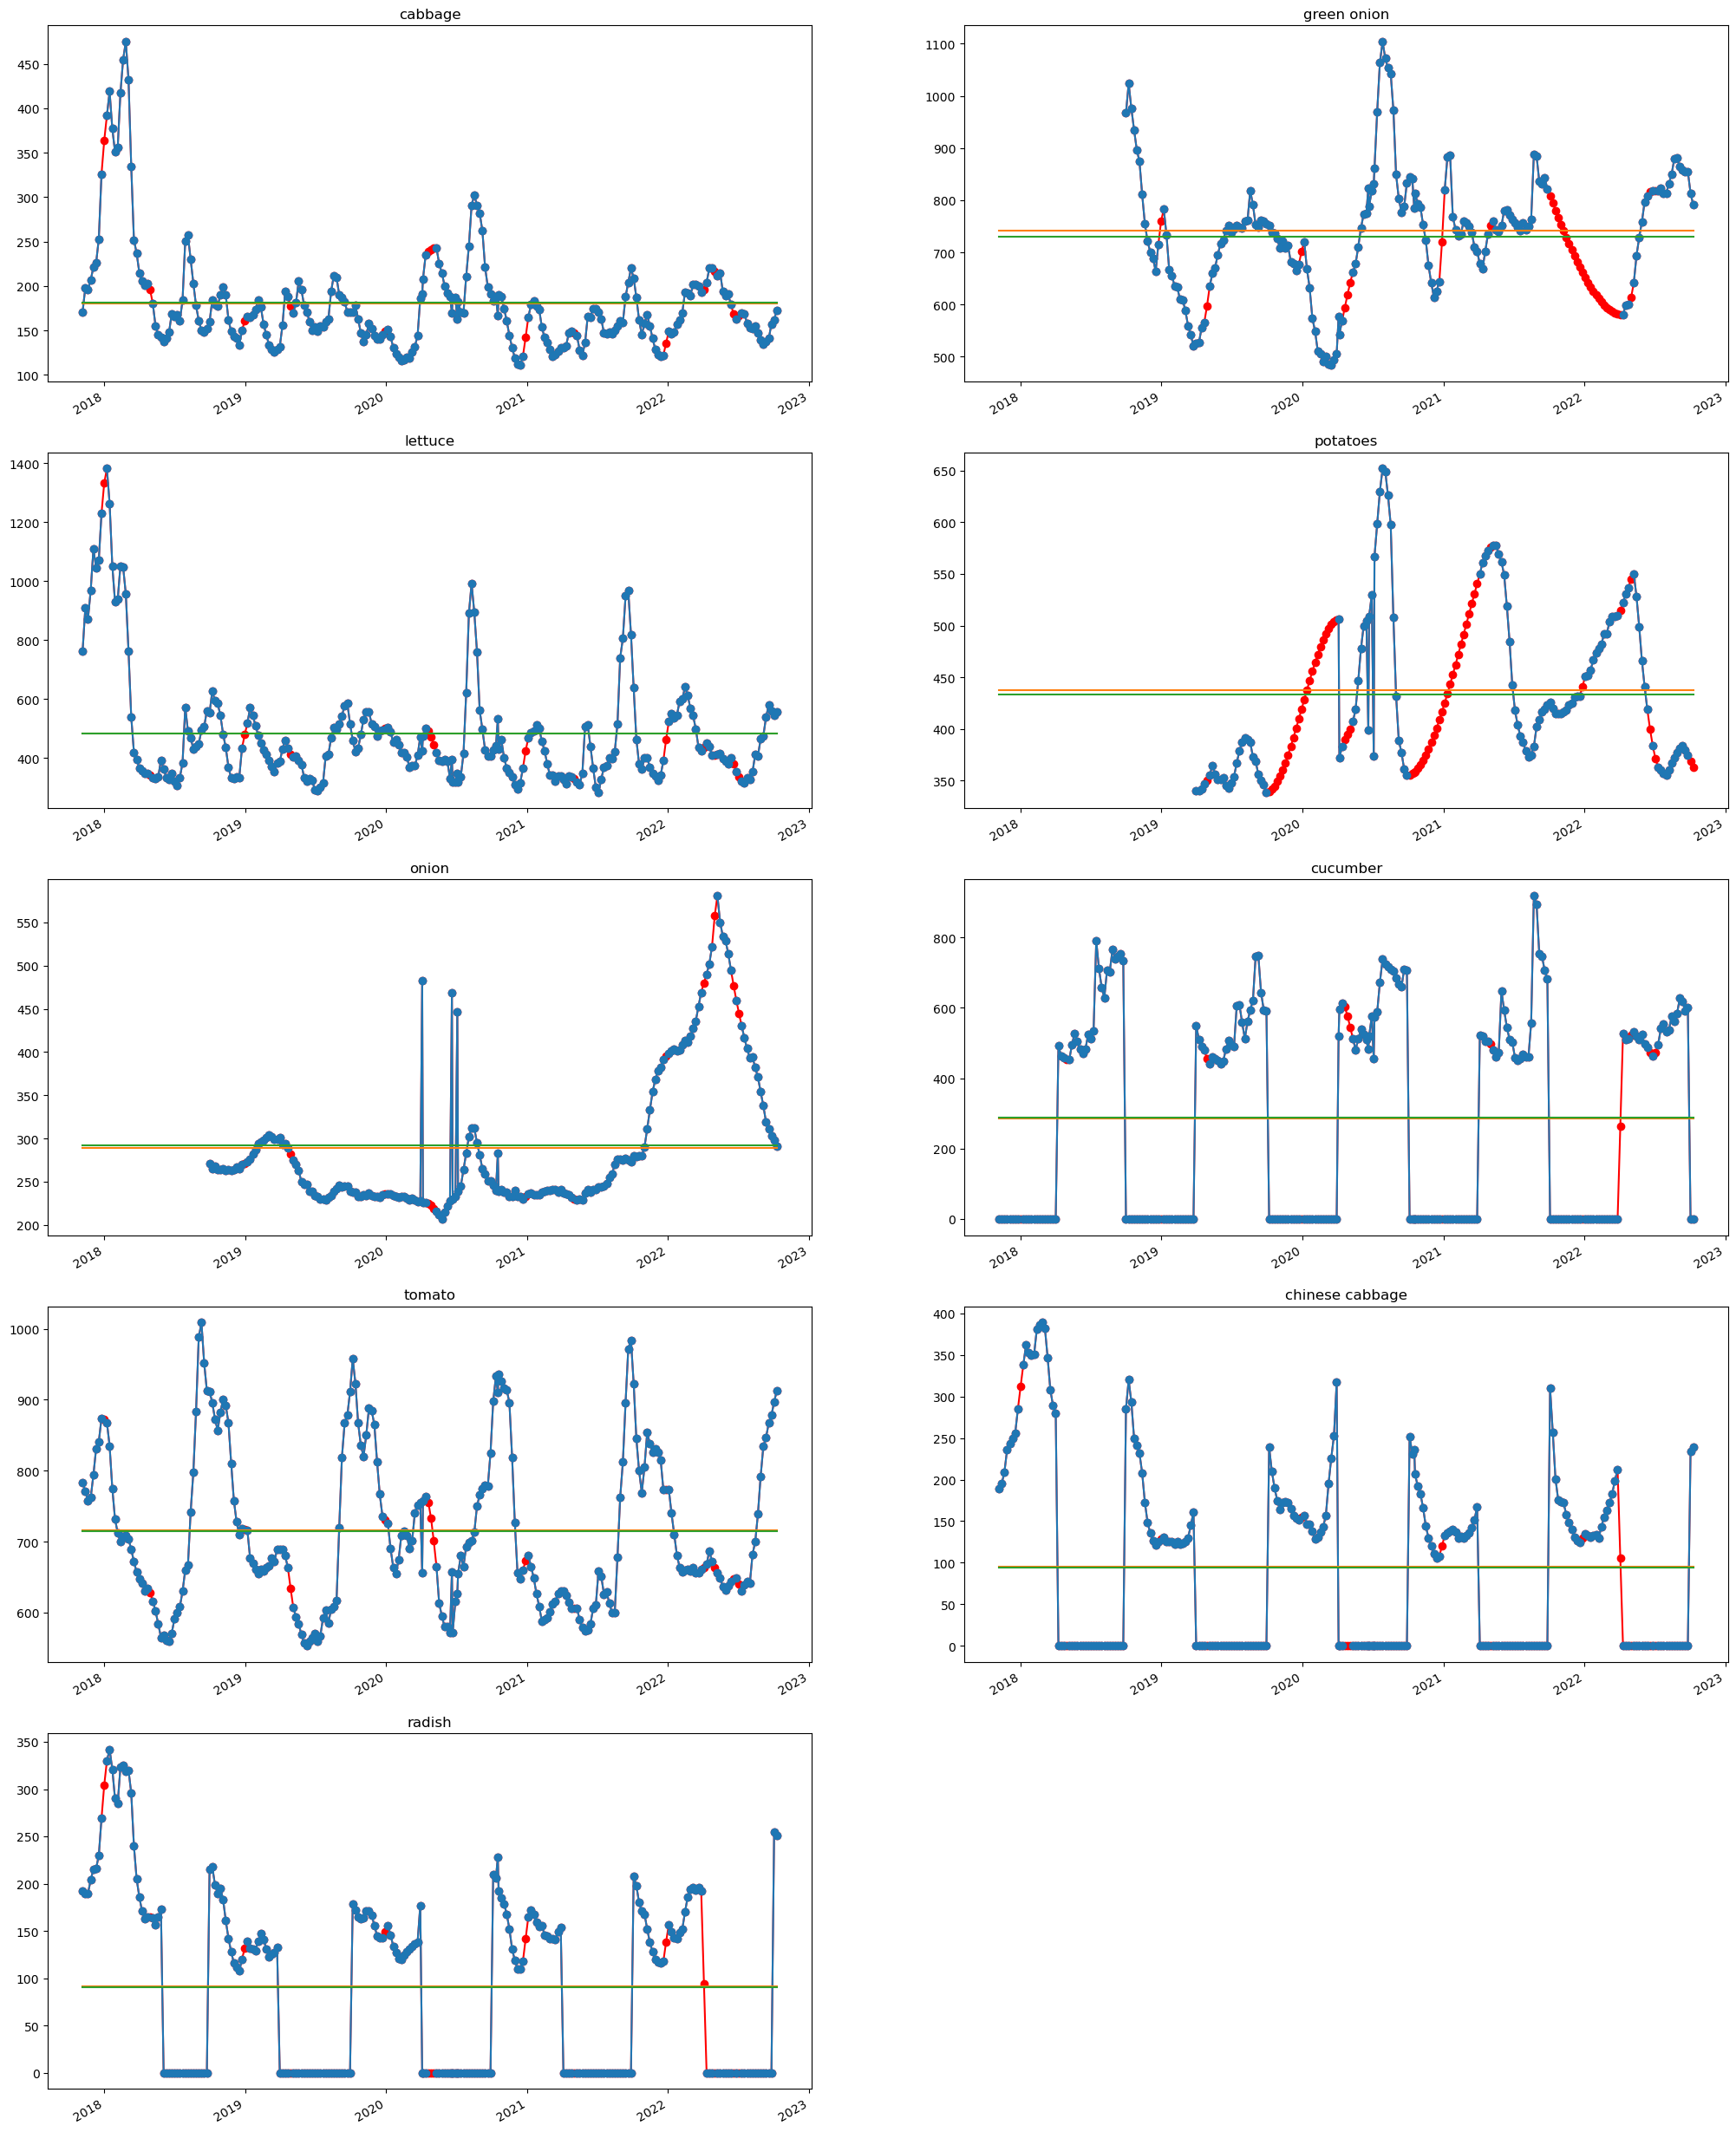

In [429]:
# create a copy of the dataset
tmp_df = df.copy()

# apply interpolation
tmp_df = df.interpolate(method='pchip')

# define figure
plt.figure(figsize=(25,35))
idx = 1

# plot histogram for all the columns
for col_name in df.columns:
    plt.subplot(5, 2, idx)
    tmp_df[col_name].plot(color='red', marker='o')
    df[col_name].plot(marker='o')
    plt.title(col_name)

    col_mean_orig = df[col_name].mean()
    col_mean_imp = tmp_df[col_name].mean()
    sns.lineplot(x=df.index, y=col_mean_orig, legend=False)
    sns.lineplot(x=df.index, y=col_mean_imp, legend=False)
    
    idx += 1

plt.show()

From the above plots, we can see that
- `akima` and `pchip` interpolation methods provides the best results
- with smooth trends, and
- almost equal global mean before and after interpolation for all the vegetables

So, we will use either one of the two for the interpolation.

In [430]:
# interpolate the missing values
df_akima = df.interpolate(method='akima')

df_akima.head()

cabbage  green onion  lettuce  potatoes  onion  cucumber  tomato  \
2017-11-06    171.0          NaN    763.0       NaN    NaN       0.0   783.0   
2017-11-13    198.0          NaN    909.0       NaN    NaN       0.0   771.0   
2017-11-20    196.0          NaN    873.0       NaN    NaN       0.0   757.0   
2017-11-27    207.0          NaN    969.0       NaN    NaN       0.0   762.0   
2017-12-04    221.0          NaN   1109.0       NaN    NaN       0.0   794.0   

            chinese cabbage  radish  
2017-11-06            189.0   192.0  
2017-11-13            195.0   190.0  
2017-11-20            209.0   190.0  
2017-11-27            236.0   204.0  
2017-12-04            243.0   215.0

However, we still have some missing values for some vegetables,
- specifically at the start of the time series
- so, we will fill these missing values with mean of the column to avoid any missing values before training our RNN.
- but this will be done after splitting the data into training and testing set to avoid data leakage.

## Data Transformation

From the above sections, we can see that we have 9 vegetables, and
- we want to predict the future price of these vegetables.
- Using RNN, we will build a model which will give a sequence of future predictions based on past time-series data
- To enable this, we have transform our dataset such that our independent features consist of the past time-series data, and
- the target feature consists of the intended future values for the corresponding past data.

![Alt text](DataTransformationpic.png)


Also, for now we will first build our model to only predict the price of one vegetable
- for eg: `cabbage`
- so, our target feature will have data of only `cabbage` and the independent feature will have data for all the 9 vegetables.

### Split into Training and Testing dataset

Before proceeding further, we will divide the data into training and testing datasets.
- We will use 80% of the data for training and validation, and
- 20% of the data testing the model

In [442]:
# determine no. of rows for training and validation
train_len = int(0.8 * df.shape[0])

# build training and testing dataset
train_df = df_akima.iloc[:train_len, :].copy()
test_df = df_akima.iloc[train_len:, :].copy()

### Fill missing values at the start and end with mean values 

In [443]:
# create temporary df of the dataset
tmp_df = train_df.copy()

# Impute the missing values at the start of the dataset with mean values
train_df.fillna(value=train_df.mean(), inplace=True)
test_df.fillna(value=test_df.mean(), inplace=True)

train_df.head()

cabbage  green onion  lettuce    potatoes       onion  cucumber  \
2017-11-06    171.0   733.075256    763.0  432.869243  254.043012       0.0   
2017-11-13    198.0   733.075256    909.0  432.869243  254.043012       0.0   
2017-11-20    196.0   733.075256    873.0  432.869243  254.043012       0.0   
2017-11-27    207.0   733.075256    969.0  432.869243  254.043012       0.0   
2017-12-04    221.0   733.075256   1109.0  432.869243  254.043012       0.0   

            tomato  chinese cabbage  radish  
2017-11-06   783.0            189.0   192.0  
2017-11-13   771.0            195.0   190.0  
2017-11-20   757.0            209.0   190.0  
2017-11-27   762.0            236.0   204.0  
2017-12-04   794.0            243.0   215.0

In [444]:
# define figure
plt.figure(figsize=(25,20))
idx = 1

# plot time series for all the columns
for col_name in df.columns:
    plt.subplot(3, 3, idx)
    
    train_df[col_name].plot(color='red', marker='.')
    tmp_df[col_name].plot(marker='o')
    plt.title(col_name)
    
    idx += 1

plt.show()
del tmp_df

<AxesSubplot:>

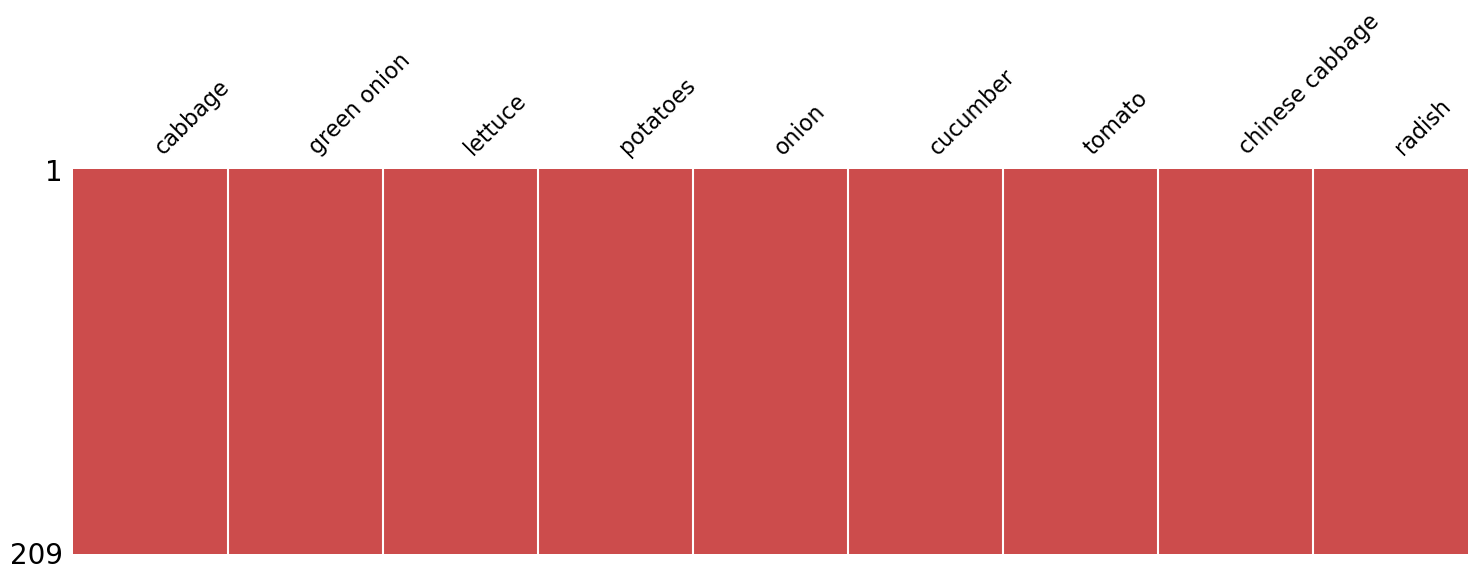

In [325]:
# visualise the pattern of missing data
msno.matrix(train_df, figsize=(18,5), color=(0.8, 0.3, 0.3), sparkline=False)

### Standardizing the features

In [326]:
# define scaler
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(train_df)

# transform the training and testing dataset
scaled_train = scaler.transform(train_df)
scaled_test = scaler.transform(test_df)

# build dataframe from the numpy.ndarray returned above
scaled_train_df = pd.DataFrame(data=scaled_train, columns=train_df.columns)
scaled_test_df = pd.DataFrame(data=scaled_test, columns=test_df.columns)

In [327]:
scaled_test_df.shape

(53, 9)

<AxesSubplot:>

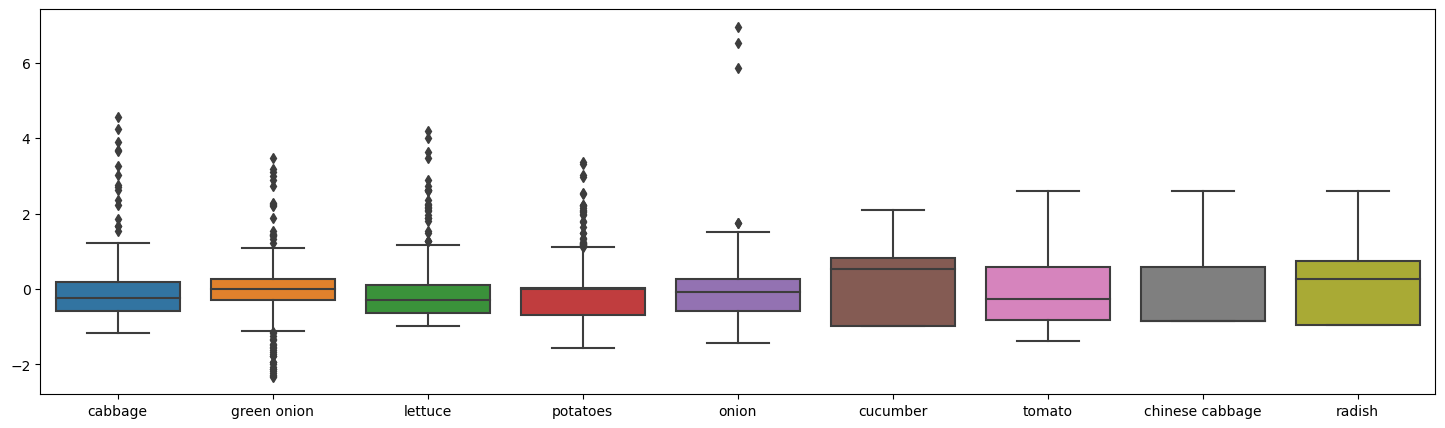

In [328]:
# define figure
plt.figure(figsize=(18,5))

# boxplot for all the columns
sns.boxplot(data=scaled_train_df)

### Transform time series dataset into a supervised learning dataset

As mentioned above, our dataset has to be now transformed before giving it as an input to the RNN model.  
For this, the following were considered:
- the model will be trained on previous 20 weeks of data, and
- the model will forecast the price of `cabbage` for the next 8 weeks.

In [329]:
# define function to transform the dataset
def build_supervised_learning_dataset(df_: pd.DataFrame, past: int, future: int) -> pd.DataFrame:
    
    # define range for the loop to build transformed dataset
    range_ = df_.shape[0] - past - future + 1

    # empty lists to be temporarily populated with formatted data
    X_arr = []
    y_arr = []

    # build the independent features
    for i in range(range_):
        X_arr.append(df_.iloc[i:i+past, :].values)
        y_arr.append(df_.iloc[i+past:i+past+future, 0].values)
    
    return X_arr, y_arr

In [330]:
# variables to define number of samples from past and future data
n_steps_in = 20            # number of historical samples to be considered
n_steps_out = 8            # number of sequences in future to be predicted

# get the transformed data
X_train, y_train = build_supervised_learning_dataset(df_=scaled_train_df, past=n_steps_in, future=n_steps_out)

print('Training feature data: ')
print(f'number of features in each record: {len(X_train[0])}')
display(X_train[0])

print('Training target data: ')
print(f'number of target values of each record: {len(y_train[0])}')
display(y_train[:4])

Training feature data: 
number of features in each record: 20


array([[-2.16551254e-01,  0.00000000e+00,  1.27153322e+00,
        -8.70742538e-16,  8.63808544e-16, -9.87697440e-01,
         6.21287632e-01,  8.29749802e-01,  1.03775916e+00],
       [ 2.08631736e-01,  0.00000000e+00,  1.96023779e+00,
        -8.70742538e-16,  8.63808544e-16, -9.87697440e-01,
         5.16527393e-01,  8.83150145e-01,  1.01699154e+00],
       [ 1.77136699e-01,  0.00000000e+00,  1.79042023e+00,
        -8.70742538e-16,  8.63808544e-16, -9.87697440e-01,
         3.94307113e-01,  1.00775095e+00,  1.01699154e+00],
       [ 3.50359399e-01,  0.00000000e+00,  2.24326707e+00,
        -8.70742538e-16,  8.63808544e-16, -9.87697440e-01,
         4.37957213e-01,  1.24805249e+00,  1.16236489e+00],
       [ 5.70824653e-01,  0.00000000e+00,  2.90366871e+00,
        -8.70742538e-16,  8.63808544e-16, -9.87697440e-01,
         7.17317852e-01,  1.31035289e+00,  1.27658681e+00],
       [ 6.49562244e-01,  0.00000000e+00,  2.60648797e+00,
        -8.70742538e-16,  8.63808544e-16, -9.876974

Training target data: 
number of target values of each record: 8


[array([ 0.82278494,  0.47633954,  0.33461188,  0.25587429,  0.28736933,
         0.166448  , -0.07482359, -0.46851154]),
 array([ 0.47633954,  0.33461188,  0.25587429,  0.28736933,  0.166448  ,
        -0.07482359, -0.46851154, -0.62598673]),
 array([ 0.33461188,  0.25587429,  0.28736933,  0.166448  , -0.07482359,
        -0.46851154, -0.62598673, -0.67322928]),
 array([ 0.25587429,  0.28736933,  0.166448  , -0.07482359, -0.46851154,
        -0.62598673, -0.67322928, -0.75196687])]

In [331]:
# transform the above list of arrays into proper numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# count of features in each sample per timestep
n_features = X_train.shape[2]

print(f'Dimension of training data: {X_train.shape}')
print(f'Dimension of target data: {y_train.shape}')

Dimension of training data: (182, 20, 9)
Dimension of target data: (182, 8)


## Model building and forecasting

## 1. Recurrent Neural Network model for forecasting

### Build RNN model to be trained on the transformed data

As shown above, our dataset is now transformed and has the following structure (shape):  
    [`samples`, `timesteps`, `features`]

We can now proceed to build our RNN model

In [332]:
# build RNN model
model = Sequential()

# add RNN layers
model.add(layers.SimpleRNN(
    units=5,
    activation='relu',
    input_shape=(n_steps_in, n_features) 
))

# add dropout layer to avoid overfitting
model.add(layers.Dropout(rate=0.2))

# add a dense layer with the desired number of outputs as the unit
model.add(layers.Dense(n_steps_out))

# evaluating loss function of MSE using the adam optimiser
model.compile(optimizer='adam', loss='mse')

# print out the model architecture
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 5)                 75        
                                                                 
 dropout_10 (Dropout)        (None, 5)                 0         
                                                                 
 dense_10 (Dense)            (None, 8)                 48        
                                                                 
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


### Train RNN model on the training data

We now train the above created model on the training data we have

In [333]:
# fit the model
history = model.fit(X_train, y_train,
                                shuffle=False,
                                epochs=200,
                                validation_split=0.2,
                                verbose=1)

Epoch 1/200
5/5 [==============================] - 2s 113ms/step - loss: 4.8001 - val_loss: 1.4682
Epoch 2/200
5/5 [==============================] - 0s 17ms/step - loss: 4.9652 - val_loss: 1.3266
Epoch 3/200
5/5 [==============================] - 0s 17ms/step - loss: 4.0548 - val_loss: 1.2100
Epoch 4/200
5/5 [==============================] - 0s 16ms/step - loss: 3.8301 - val_loss: 1.1117
Epoch 5/200
5/5 [==============================] - 0s 17ms/step - loss: 3.2356 - val_loss: 1.0292
Epoch 6/200
5/5 [==============================] - 0s 21ms/step - loss: 3.0304 - val_loss: 0.9597
Epoch 7/200
5/5 [==============================] - 0s 16ms/step - loss: 2.7316 - val_loss: 0.9008
Epoch 8/200
5/5 [==============================] - 0s 16ms/step - loss: 2.4208 - val_loss: 0.8504
Epoch 9/200
5/5 [==============================] - 0s 16ms/step - loss: 2.3658 - val_loss: 0.8063
Epoch 10/200
5/5 [==============================] - 0s 16ms/step - loss: 2.0584 - val_loss: 0.7689
Epoch 11/200
5/5 [

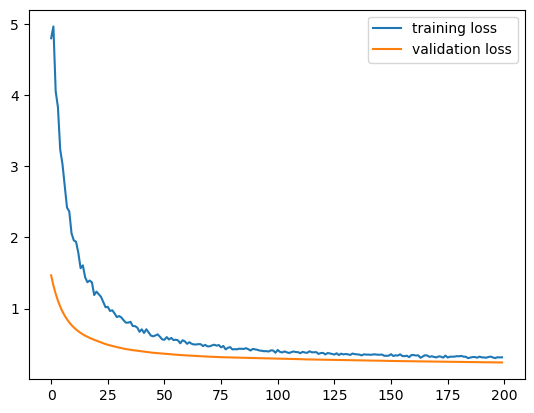

In [334]:
# plot the training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

### Predict the future values with the trained RNN model

Now, we can predict the future values with the RNN model we have trained above

In [335]:
# transform the testing data in the desired format
X_test, y_test = build_supervised_learning_dataset(df_=scaled_test_df, past=n_steps_in, future=n_steps_out)

# transform the above list of arrays into proper numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# predict the future values
y_hat = model.predict(X_test, verbose=0)

In [336]:
# calculate Error metrices
srnn_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=y_hat)
srnn_rmse = mean_squared_error(y_true=y_test, y_pred=y_hat, squared=True)

print(f'Mean absolute percentage error: {srnn_mape:.4f}')
print(f'Root Mean Squared error: {srnn_rmse:.4f}')


Mean absolute percentage error: 1.0625
Root Mean Squared error: 0.1961


## 2. Long Short-Term Memory networks for forecasting

### Build LSTM model to be trained on the transformed data

We build our LSTM model

In [366]:
# build LSTM model
model = Sequential()

# add LSTM layers
model.add(layers.LSTM(
    units=5,
    activation='relu',
    input_shape=(n_steps_in, n_features) 
))

# add dropout layer to avoid overfitting
model.add(layers.Dropout(rate=0.2))

# add a dense layer with the desired number of outputs as the unit
model.add(layers.Dense(n_steps_out))

# evaluating loss function of MSE using the adam optimiser
model.compile(optimizer='adam', loss='mse')

# print out the model architecture
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 5)                 300       
                                                                 
 dropout_18 (Dropout)        (None, 5)                 0         
                                                                 
 dense_18 (Dense)            (None, 8)                 48        
                                                                 
Total params: 348
Trainable params: 348
Non-trainable params: 0
_________________________________________________________________


### Train LSTM model on the training data

We now train the above created model on the training data we have

In [373]:
# fit the model
history = model.fit(X_train, y_train,
                                shuffle=False,
                                epochs=100,
                                validation_split=0.2,
                                verbose=1)

Epoch 1/100
5/5 [==============================] - 0s 32ms/step - loss: 0.1979 - val_loss: 1.6941
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 0.1758 - val_loss: 1.7283
Epoch 3/100
5/5 [==============================] - 0s 20ms/step - loss: 0.1856 - val_loss: 1.7890
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 0.1960 - val_loss: 1.8399
Epoch 5/100
5/5 [==============================] - 0s 20ms/step - loss: 0.1911 - val_loss: 1.8979
Epoch 6/100
5/5 [==============================] - 0s 32ms/step - loss: 0.1894 - val_loss: 1.9422
Epoch 7/100
5/5 [==============================] - 0s 25ms/step - loss: 0.1686 - val_loss: 1.8343
Epoch 8/100
5/5 [==============================] - 0s 21ms/step - loss: 0.1739 - val_loss: 1.6710
Epoch 9/100
5/5 [==============================] - 0s 20ms/step - loss: 0.1824 - val_loss: 1.5934
Epoch 10/100
5/5 [==============================] - 0s 20ms/step - loss: 0.1899 - val_loss: 1.6214
Epoch 11/100
5/5 [=

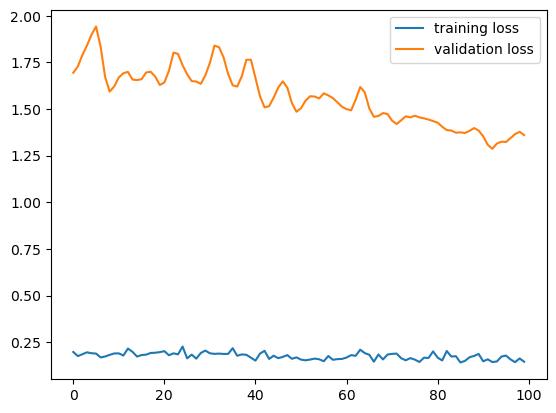

In [374]:
# plot the training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

### Predict the future values with the trained LSTM model

Now, we can predict the future values with the LSTM model we have trained above

In [ ]:
# transform the testing data in the desired format
X_test, y_test = build_supervised_learning_dataset(df_=scaled_test_df, past=n_steps_in, future=n_steps_out)

# transform the above list of arrays into proper numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# predict the future values
y_hat = model.predict(X_test, verbose=0)

In [ ]:
# calculate Error metrices
lstm_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=y_hat)
lstm_rmse = mean_squared_error(y_true=y_test, y_pred=y_hat, squared=True)

print(f'Mean absolute percentage error: {lstm_mape:.4f}')
print(f'Root Mean Squared error: {lstm_rmse:.4f}')


Mean absolute percentage error: 2.3099
Root Mean Squared error: 0.4814


## 3. Gated Recurrent Unit networks for forecasting

### Build GRU model to be trained on the transformed data

We build our GRU model

In [375]:
# build GRU model
model = Sequential()

# add GRU layers
model.add(layers.GRU(
    units=5,
    activation='relu',
    input_shape=(n_steps_in, n_features) 
))

# add dropout layer to avoid overfitting
model.add(layers.Dropout(rate=0.2))

# add a dense layer with the desired number of outputs as the unit
model.add(layers.Dense(n_steps_out))

# evaluating loss function of MSE using the adam optimiser
model.compile(optimizer='adam', loss='mse')

# print out the model architecture
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5)                 240       
                                                                 
 dropout_19 (Dropout)        (None, 5)                 0         
                                                                 
 dense_19 (Dense)            (None, 8)                 48        
                                                                 
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


### Train GRU model on the training data

We now train the above created model on the training data we have

In [376]:
# fit the model
history = model.fit(X_train, y_train,
                                shuffle=False,
                                epochs=100,
                                validation_split=0.2,
                                verbose=1)

Epoch 1/100
5/5 [==============================] - 5s 133ms/step - loss: 0.5147 - val_loss: 0.4373
Epoch 2/100
5/5 [==============================] - 0s 35ms/step - loss: 0.4902 - val_loss: 0.4281
Epoch 3/100
5/5 [==============================] - 0s 39ms/step - loss: 0.4801 - val_loss: 0.4196
Epoch 4/100
5/5 [==============================] - 0s 27ms/step - loss: 0.4689 - val_loss: 0.4115
Epoch 5/100
5/5 [==============================] - 0s 25ms/step - loss: 0.4792 - val_loss: 0.4039
Epoch 6/100
5/5 [==============================] - 0s 27ms/step - loss: 0.4485 - val_loss: 0.3969
Epoch 7/100
5/5 [==============================] - 0s 26ms/step - loss: 0.4443 - val_loss: 0.3905
Epoch 8/100
5/5 [==============================] - 0s 25ms/step - loss: 0.4329 - val_loss: 0.3848
Epoch 9/100
5/5 [==============================] - 0s 25ms/step - loss: 0.4299 - val_loss: 0.3794
Epoch 10/100
5/5 [==============================] - 0s 33ms/step - loss: 0.4313 - val_loss: 0.3742
Epoch 11/100
5/5 [

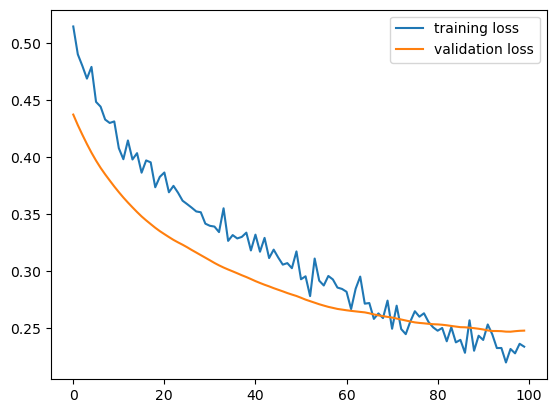

In [377]:
# plot the training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

### Predict the future values with the trained GRU model

Now, we can predict the future values with the GRU model we have trained above

In [378]:
# transform the testing data in the desired format
X_test, y_test = build_supervised_learning_dataset(df_=scaled_test_df, past=n_steps_in, future=n_steps_out)

# transform the above list of arrays into proper numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# predict the future values
y_hat = model.predict(X_test, verbose=0)

In [379]:
# calculate Error metrices
gru_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=y_hat)
gru_rmse = mean_squared_error(y_true=y_test, y_pred=y_hat, squared=True)

print(f'Mean absolute percentage error: {gru_mape:.4f}')
print(f'Root Mean Squared error: {gru_rmse:.4f}')


Mean absolute percentage error: 3.4339
Root Mean Squared error: 0.9366
